In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import gym
import numpy as np


import os, sys
sys.path.insert(0,'..')

from collections import deque 

from dfibert.tracker.nn.rl import Agent, Action_Scheduler, DQN
import dfibert.envs.RLtractEnvironment as RLTe
from dfibert.envs._state import TractographyState

In [28]:
# Test on Lunar Lander to check functionality of agent
#env = gym.make('LunarLander-v2')
#n_actions= env.action_space.n

In [29]:
max_steps = 30000000
replay_memory_size = 60000
agent_history_length = 1
evaluate_every = 200000
eval_runs = 5#20
network_update_every = 10000
start_learning = 20000
eps_annealing_steps = 10000000

max_episode_length = 2000
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

batch_size = 64
learning_rate = 0.0000000625
#batch_size = 512
#learning_rate = 0.001

In [54]:
#env = RLTe.RLtractEnvironment(stepWidth=0.3, action_space=20, device = 'cpu')
env = RLTe.RLtractEnvironment(stepWidth=0.3, action_space=20, device = 'cpu', pReferenceStreamlines='data/HCP307200_DTI_min40.vtk')
n_actions = env.action_space.n

Loading precomputed streamlines (data/HCP307200_DTI_smallSet.vtk) for ID 100307
Loading precomputed streamlines (data/HCP307200_DTI_min40.vtk) for ID 100307


In [55]:
state = env.reset()
print(state)
#print(state.getValue().flatten().shape)

In [56]:
state = env.reset(streamline_index=0)
#env.stepCounter += 1
#state = env.state = TractographyState(env.referenceStreamline_ijk[1], env.interpolateDWIatState)
best_actions = []
    #path_vectors = []
    #reference_vectors = []
    #cosine_sims = []
    #distances = []
rewards = []
all_states = []
all_states.append(state.getCoordinate())
for i in range(n_actions):
    #print(state.getCoordinate(), env.state.getCoordinate())
    #print(env.stepCounter)
    next_state, reward,_,_ = env.step(i)
    all_states.append(next_state.getCoordinate())
    all_states.append(state.getCoordinate())
    rewards.append(reward)
    #print(reward)
    best_actions.append(reward)
    env.state = state
    env.stepCounter -= 1
best_action= torch.argmax(torch.tensor(best_actions))
#return best_action, rewards[best_action]
print(best_action, float(rewards[best_action]))
#print(np.argmin(rewards))


tensor(0) 1.0


In [57]:
#cos = torch.nn.CosineSimilarity(dim=0)

def get_best_action(state, env):
    best_actions = []
    #path_vectors = []
    #reference_vectors = []
    #cosine_sims = []
    #distances = []
    rewards = []
    for i in range(n_actions):
        #print(state.getCoordinate(), env.state.getCoordinate())
        #print(env.stepCounter)
        next_state, reward,_,_ = env.step(i)
        #print(env.stepCounter)
        #current_index = np.min([env.stepCounter,len(env.referenceStreamline_ijk)-1])
        #print(current_index)
        #path_vector = next_state.getCoordinate() - state.getCoordinate().squeeze(0)
        #print(path_vector)
        #path_vectors.append(path_vector.numpy())
        #reference_vector = env.referenceStreamline_ijk[current_index]-env.referenceStreamline_ijk[current_index-1]
        #print(reference_vector)
        #reference_vectors.append(reference_vector.numpy())
        #cosine_sim = cos(path_vector, reference_vector)
        #cosine_sims.append(cosine_sim.item())
        #print(cosine_sim)
        #dist = torch.sum((env.referenceStreamline_ijk[current_index] - next_state.getCoordinate())**2)
        #dist = torch.dist(env.referenceStreamline_ijk[current_index], next_state.getCoordinate(), p=2)
        #reward = -dist
        #if dist < 0.1:
        #    dist = 0
        #else:
        #    dist = dist - 0.1
        #print(dist)
        #distances.append(dist.item())

        #reward = cosine_sim - dist
        #reward = cosine_sim
        rewards.append(float(reward))
        #print(reward)
        best_actions.append(reward)
        env.state = state
        if reward > 0.:
            env.points_visited -= 1

    #best_actions = torch.topk(torch.tensor(best_actions), k=1)[1].numpy()
    #rewards = np.array(rewards)
    #print(rewards)
    #random_action = np.random.choice(best_actions, size=1)
    best_action= torch.argmax(torch.tensor(best_actions))
    return best_action, rewards[best_action]#random_action
    #return best_actions, rewards[best_actions]

In [58]:
res, _, _, _ = env.step(5)

In [59]:
res

In [60]:
state = env.reset(streamline_index=0)
all_top_actions = []
all_top_rewards = []
terminal = False
while terminal != True:
    best_actions, best_rewards = get_best_action(state, env)
    all_top_actions.append(best_actions)
    all_top_rewards.append(best_rewards)
    next_state, reward, terminal, _ = env.step(best_actions)
    state = next_state

for i in range(len(all_top_actions)):
    print(all_top_actions[i], all_top_rewards[i])
print(len(all_top_actions))

tensor(0) 1.0
tensor(0) 0.0
tensor(1) 0.0
tensor(1) 0.0
tensor(5) 0.0
tensor(5) 0.0
tensor(6) 0.0
tensor(1) 0.0
tensor(1) 0.0
tensor(6) 0.0
tensor(1) 0.0
tensor(1) 0.0
tensor(5) 0.0
tensor(6) 0.0
tensor(1) 0.0
tensor(5) 0.0
tensor(6) 0.0
tensor(1) 0.0
tensor(1) 0.0
tensor(6) 0.0
tensor(1) 0.0
tensor(6) 0.0
tensor(1) 0.0
tensor(2) 0.0
tensor(6) 0.0
tensor(1) 0.0
tensor(5) 0.0
tensor(6) 0.0
tensor(1) 0.0
tensor(6) 0.0
tensor(1) 0.0
tensor(2) 0.0
tensor(6) 0.0
tensor(1) 0.0
tensor(5) 0.0
tensor(6) 0.0
tensor(1) 0.0
tensor(6) 0.0
tensor(1) 0.0
tensor(2) 0.0
tensor(6) 0.0
tensor(1) 0.0
tensor(6) 0.0
tensor(1) 0.0
tensor(2) 0.0
tensor(6) 0.0
tensor(1) 0.0
tensor(4) 0.0
48


### Transfer learning
Fill replay memory with perfect actions for supervised approach

In [64]:
action, _ = get_best_action(state,env)
next_state, reward, terminal, _ = env.step(action)

In [62]:
from dfibert.tracker import StreamlinesFromFileTracker

file_sl = StreamlinesFromFileTracker(env.pReferenceStreamlines)
file_sl.track()

tracked_streamlines = file_sl.get_streamlines()

In [63]:
from tqdm import trange
state = env.reset().getValue()
agent = Agent(n_actions=n_actions, inp_size=state.shape, device=device, hidden=10, gamma=0.99, agent_history_length=agent_history_length, memory_size=replay_memory_size, batch_size=512, learning_rate=learning_rate)

overall_runs = 0
overall_reward = []
for overall_runs in trange(15):
    state = env.reset(streamline_index=overall_runs)
    #episode_step_counter = 0
    episode_reward = 0
    terminal = False
    #print("New run")
    #print(env.stepCounter, state.getCoordinate().numpy())
    for i in range(1000):#while not terminal:
        #print(env.stepCounter)
        #if np.random.rand(1) < 0.1: 
        #    action = np.random.randint(0, n_actions)
        #else:
        action, _ = get_best_action(state,env)
        next_state, reward, terminal, _ = env.step(action)
        
        #terminal = False

        #current_index = np.min([env.stepCounter,len(env.referenceStreamline_ijk)-1])
        #path_vector = (next_state.getCoordinate() - state.getCoordinate()).squeeze(0)
        #reference_vector = env.referenceStreamline_ijk[current_index]-env.referenceStreamline_ijk[current_index-1]
        #    #print(path_vector, reference_vector)
        #cosine_sim = cos(path_vector, reference_vector)
        #dist = torch.sum((env.referenceStreamline_ijk[current_index] - next_state.getCoordinate())**2)
        #if dist > 3*0.81:
        #    env.stepCounter -= 1
        #if dist < 0.1:
        #    dist = 0
        #else:
        #    dist = dist - 0.1
        #reward = cosine_sim - dist
        #reward_old = 1 - (optimal_reward - reward)
        #print(env.stepCounter, next_state.getCoordinate().numpy(), reward, reward_old, terminal)
        #if action == 100 and dist==0:
        #    terminal = True

        #if env.stepCounter == 200:
        #    terminal = True
        #dist = torch.dist(env.referenceStreamline_ijk[current_index], next_state.getCoordinate(), p=2)
        
        #reward = 0.
            #positive_run += 1 
        #if dist > 2.:
        #    reward = -1.
        #    #print("Got negative reward at step ", i)

        #if dist > 0.25:
        #    env.stepCounter -= 1
        #    #if dist < dist_past:
        #    #    reward = 0.5
        #else:
        #    #print("Reached referencePoint at step", i)
        #    reward = 1.
            
        agent.replay_memory.add_experience(action=action,
                                state = state.getValue(),
                                reward=reward,
                                new_state = next_state.getValue(),
                                terminal=terminal)
        
        episode_reward += reward
        
        state = next_state
        
        if terminal == True:
            break
            
    overall_runs += 1
    overall_reward.append(episode_reward)
    print(overall_runs, np.mean(overall_reward[-100:]))
print("Replay memory ready")


  7%|▋         | 1/15 [00:12<02:59, 12.83s/it]

1 0.0



 13%|█▎        | 2/15 [00:25<02:46, 12.82s/it]

2 0.0



 20%|██        | 3/15 [00:38<02:33, 12.80s/it]

3 0.3333333333333333



 27%|██▋       | 4/15 [00:51<02:20, 12.79s/it]

4 0.5



 33%|███▎      | 5/15 [01:03<02:07, 12.80s/it]

5 0.6



 40%|████      | 6/15 [01:16<01:55, 12.79s/it]

6 0.5



 47%|████▋     | 7/15 [01:29<01:42, 12.79s/it]

7 0.5714285714285714



 53%|█████▎    | 8/15 [01:42<01:29, 12.85s/it]

8 0.625



 60%|██████    | 9/15 [01:55<01:16, 12.83s/it]

9 0.5555555555555556



 67%|██████▋   | 10/15 [02:08<01:04, 12.81s/it]

10 0.5



 73%|███████▎  | 11/15 [02:20<00:51, 12.83s/it]

11 0.45454545454545453



 80%|████████  | 12/15 [02:33<00:38, 12.82s/it]

12 0.5833333333333334



 87%|████████▋ | 13/15 [02:46<00:25, 12.85s/it]

13 0.6153846153846154



 93%|█████████▎| 14/15 [02:59<00:12, 12.87s/it]

14 0.7142857142857143



100%|██████████| 15/15 [03:12<00:00, 12.88s/it]

15 0.7333333333333333
Replay memory ready


In [66]:
#save memory
import h5py
hf = h5py.File('memory_dti.hdf5', 'w')
hf.create_dataset('states', data=agent.replay_memory.states[:agent.replay_memory.count])
hf.create_dataset('new_states', data=agent.replay_memory.new_states[:agent.replay_memory.count])
hf.create_dataset('actions', data=agent.replay_memory.actions[:agent.replay_memory.count])
hf.create_dataset('rewards', data=agent.replay_memory.rewards[:agent.replay_memory.count])
hf.create_dataset('terminals', data=agent.replay_memory.terminal_flags[:agent.replay_memory.count])
hf.close()


In [67]:
#load memory
#state = #env.reset().getValue()
agent_learn = Agent(n_actions=20, inp_size=(642, 3, 3, 3), device=device, hidden=10, gamma=0.95, agent_history_length=agent_history_length, memory_size=replay_memory_size, batch_size=512, learning_rate=learning_rate)
hf = h5py.File('memory_dti.hdf5', 'r')
agent_learn.replay_memory.states = np.array(hf["states"][:60000])
agent_learn.replay_memory.new_states = np.array(hf["new_states"][:60000])
agent_learn.replay_memory.actions = np.array(hf["actions"][:60000])
agent_learn.replay_memory.rewards = np.array(hf["rewards"][:60000])
agent_learn.replay_memory.terminal_flags = np.array(hf["terminals"][:60000])
hf.close()

In [68]:
print(agent_learn.replay_memory.states.shape)

(720, 100, 3, 3, 3)


In [69]:
agent_learn.replay_memory.count = 60000

In [72]:
agent_learn = Agent(n_actions=101, inp_size=(100, 3, 3, 3), device=device, hidden=10, gamma=0.95, agent_history_length=agent_history_length, memory_size=replay_memory_size, batch_size=512, learning_rate=learning_rate)
hf = h5py.File('memory_dti.hdf5', 'r')
agent_learn.replay_memory.states = np.array(hf["states"][:])
agent_learn.replay_memory.new_states = np.array(hf["new_states"][:])
agent_learn.replay_memory.actions = np.array(hf["actions"][:])
agent_learn.replay_memory.rewards = np.array(hf["rewards"][:])
agent_learn.replay_memory.terminal_flags = np.array(hf["terminals"][:])
print(agent_learn.replay_memory.states.shape)

(720, 100, 3, 3, 3)


In [73]:
agent_learn.replay_memory.count = 30000

In [74]:
agent.optimizer = torch.optim.Adam(agent.main_dqn.parameters(), 0.00001)

In [124]:
#### Supervised learning on perfect memory --> worked

state = env.reset().getValue()
agent_learn = Agent(n_actions=n_actions, inp_size=state.shape, device=device, hidden=10, gamma=0.99, agent_history_length=agent_history_length, memory_size=replay_memory_size, batch_size=64, learning_rate=0.00001)
losses = []

with trange(50000, unit="epochs") as pbar:
    for i in pbar:
    
        states, actions, _, _, _ = agent.replay_memory.get_minibatch()

        states = torch.FloatTensor(states).to(agent.device)
        actions = torch.LongTensor(actions).to(agent.device)

        predicted_q = agent.main_dqn(states)
        loss = torch.nn.functional.cross_entropy(predicted_q, actions)
        #print(loss.item())
        agent.optimizer.zero_grad()
        loss.backward()
        agent.optimizer.step()
        losses.append(loss.item())

        pbar.set_postfix(loss=loss.item())


  3%|▎         | 1465/50000 [00:15<08:23, 96.42it/s]


  6%|▌         | 2925/50000 [00:30<08:09, 96.22it/s]


  9%|▉         | 4385/50000 [00:45<07:55, 95.91it/s]


 12%|█▏        | 5845/50000 [01:00<07:40, 95.83it/s]


 15%|█▍        | 7305/50000 [01:16<07:30, 94.81it/s]


 18%|█▊        | 8765/50000 [01:31<07:10, 95.74it/s]


 20%|██        | 10215/50000 [01:46<06:54, 95.93it/s]


 23%|██▎       | 11645/50000 [02:01<06:37, 96.48it/s]


 26%|██▌       | 13075/50000 [02:16<06:22, 96.62it/s]


 29%|██▉       | 14505/50000 [02:31<06:07, 96.51it/s]


 32%|███▏      | 15935/50000 [02:46<05:56, 95.64it/s]


 35%|███▍      | 17365/50000 [03:01<05:40, 95.85it/s]


 38%|███▊      | 18795/50000 [03:16<05:23, 96.37it/s]


 40%|████      | 20225/50000 [03:30<05:11, 95.62it/s]


 43%|████▎     | 21655/50000 [03:45<04:52, 97.03it/s]


 46%|████▌     | 23085/50000 [04:00<04:38, 96.60it/s]


 49%|████▉     | 24515/50000 [04:15<04:24, 96.35it/s]


 52%|█████▏    | 25945/50000 [04:30<04:09, 96.25it/s]


 55%|█████▍    | 27375/50000 [04:45<03:56, 95.80it/s]


 58%|█████▊    | 28805/50000 [04:59<03:39, 96.53it/s]


 60%|██████    | 30235/50000 [05:14<03:24, 96.74it/s]


 63%|██████▎   | 31665/50000 [05:29<03:09, 96.52it/s]


 66%|██████▌   | 33095/50000 [05:44<02:56, 95.62it/s]


 69%|██████▉   | 34525/50000 [05:59<02:40, 96.23it/s]


 72%|███████▏  | 35955/50000 [06:14<02:26, 95.97it/s]


 75%|███████▍  | 37385/50000 [06:29<02:11, 96.11it/s]


 78%|███████▊  | 38815/50000 [06:44<01:56, 95.67it/s]


 80%|████████  | 40245/50000 [06:59<01:42, 95.52it/s]


 83%|████████▎ | 41675/50000 [07:14<01:26, 96.35it/s]


 86%|████████▌ | 43105/50000 [07:28<01:11, 95.87it/s]


 89%|████████▉ | 44535/50000 [07:43<00:56, 95.89it/s]


 92%|█████████▏| 45965/50000 [07:58<00:41, 96.46it/s]


 95%|█████████▍| 47395/50000 [08:13<00:27, 96.10it/s]


 98%|█████████▊| 48825/50000 [08:28<00:12, 96.39it/s]


100%|██████████| 50000/50000 [08:40<00:00, 96.05it/s]

In [125]:
mean_losses = []
for i in range(len(losses)):
    mean_losses.append(np.mean(losses[i:i+99]))
print(mean_losses[-20:])

[0.06206131260842085, 0.06239398196339607, 0.06378891153468026, 0.0637623536236146, 0.06451324722729623, 0.06443658595283826, 0.06431158339338643, 0.0646169394827806, 0.06501431949436665, 0.06528636576099829, 0.06760859973728657, 0.06438127118680212, 0.06593545293435454, 0.06684187373944692, 0.06885100776950519, 0.06754523664712905, 0.069995759986341, 0.06586295490463574, 0.06029188446700573, 0.0648515596985817]


<IPython.core.display.Javascript object>


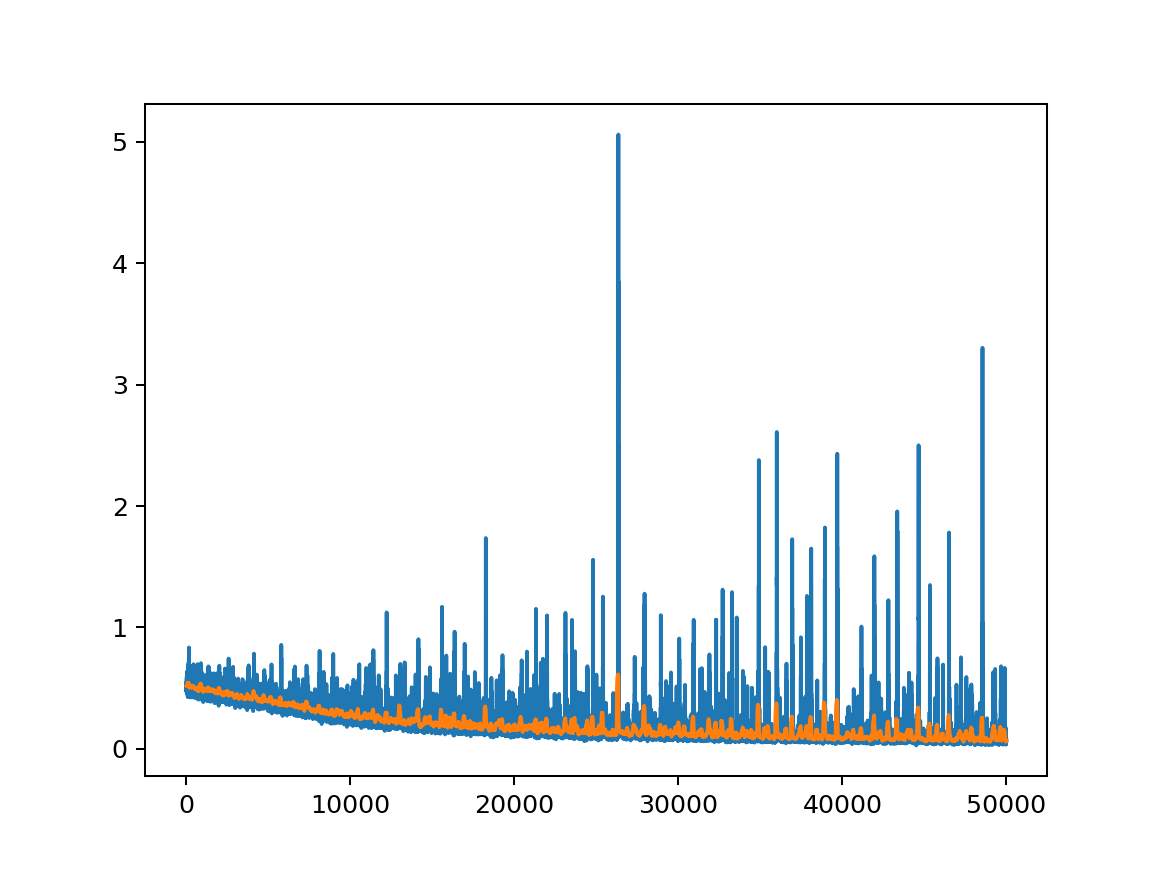

In [126]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(range(len(losses[:])), losses[:])
plt.plot(range(len(losses[:])), mean_losses[:])
plt.show()

In [134]:
agent.target_dqn.load_state_dict(agent.main_dqn.state_dict())

<All keys matched successfully>

In [135]:
states, actions, _, _, _ = agent.replay_memory.get_minibatch()
states = torch.FloatTensor(states).to(agent.device)
predicted_q = torch.argmax(agent.main_dqn(states), dim=1)

false = 0
for i in range(len(actions)):
    if predicted_q[i] != actions[i]:
        false += 1 
    
print("Accuracy =", 1 - false / len(actions))

Accuracy = 0.9765625


In [147]:
#### test performance of pretrained agent

state = env.reset(streamline_index=0)
terminal = False
all_states = []
all_states.append(state.getCoordinate())


class Object(object):
    pass

states = Object()
states.x = [state.getCoordinate()[0]]
states.y = [state.getCoordinate()[1]]
states.z = [state.getCoordinate()[2]]

#while not terminal:
for i in range(10):
    action, optimal_reward  = get_best_action(state, env)
    next_state, reward, terminal, _ = env.step(action)
    #print("Step counter: ", env.stepCounter)
    #current_index = np.min([env.stepCounter,len(env.referenceStreamline_ijk)-1])
    #print("Current index: ", current_index)
    #print("state.getCoordinate(): ", state.getCoordinate().numpy())
    #print("env.state.getCoordinate(): ", env.state.getCoordinate().numpy())
    #print("next_state.getCoordinate(): ", next_state.getCoordinate().numpy())
    #path_vector = next_state.getCoordinate() - state.getCoordinate().squeeze(0)
    #print("path vector: ", path_vector)
    #reference_vector = env.referenceStreamline_ijk[current_index]-env.referenceStreamline_ijk[current_index-1]
    #print("reference_vector: ", reference_vector)
    #cosine_sim = F.cosine_similarity(path_vector, reference_vector, dim=0)
    #print("cosine_sim: ", cosine_sim)
    #dist = torch.dist(env.referenceStreamline_ijk[current_index], next_state.getCoordinate(), p=2)#torch.sum((env.referenceStreamline_ijk[current_index] - next_state.getCoordinate())**2)
    #dist_past = torch.dist(env.referenceStreamline_ijk[current_index], state.getCoordinate(), p=2)
    #if dist > 0.3:
    #    env.stepCounter -= 1
    #reward = 0.
    #    #positive_run += 1 
    #if dist > 2.:
    #    reward = -1.

    #if dist > 0.26:
    #    env.stepCounter -= 1
        #if dist < dist_past:
        #    reward = 0.5
    #else:
    #    reward = 1.
    #print("distance: ", dist)
    all_states.append(next_state.getCoordinate())
    state = next_state
    
    states.x.append(state.getCoordinate()[0])
    states.y.append(state.getCoordinate()[1])
    states.z.append(state.getCoordinate()[2])
    
    print(env.stepCounter, action, reward)#cosine_sim.item(), dist.item(), 1-(optimal_reward-(cosine_sim-dist)))
    #if action == 100 and 1-(optimal_reward-(cosine_sim-dist)) == 1:
    #    terminal = True
    #else:
    #    terminal = False
    

21 tensor(0) 1.0
42 tensor(0) 0.0
63 tensor(1) 0.0
84 tensor(1) 0.0
105 tensor(5) 0.0
126 tensor(5) 0.0
147 tensor(6) 0.0
168 tensor(1) 0.0
189 tensor(1) 0.0
210 tensor(6) 0.0


# Validation of our agent

<IPython.core.display.Javascript object>


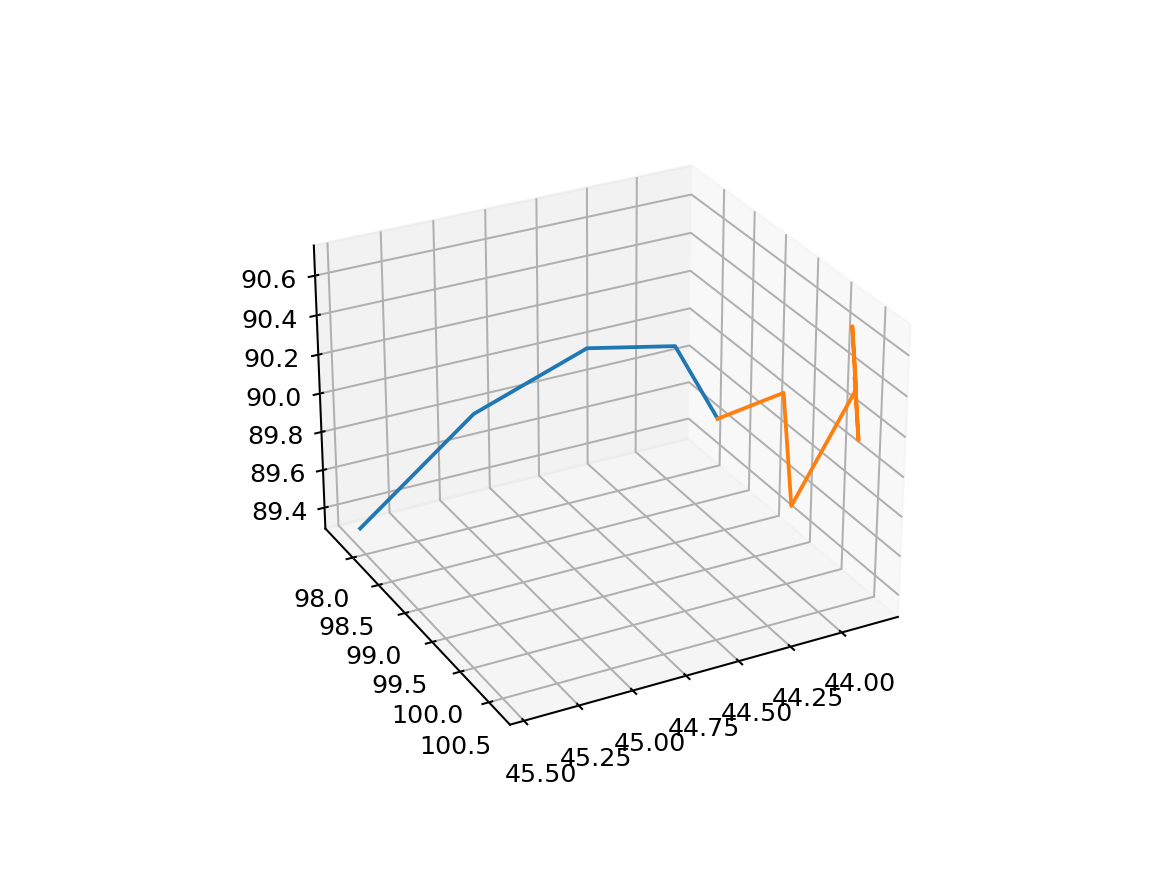

In [148]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

#for i in range(len(states)):
#    print(states[i], env.referenceStreamline_ijk[i])
#    distance = ((states.T[0][i] - env.referenceStreamline_ijk.T[0][i])**2 \
#                      + (states.T[1][i] - env.referenceStreamline_ijk.T[1][i] )**2 \
#                      + (states.T[2][i] - env.referenceStreamline_ijk.T[2][i])**2)
#    print(distance)
no_timesteps = 5

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(env.referenceStreamline_ijk.T[0][0:no_timesteps], env.referenceStreamline_ijk.T[1][0:no_timesteps], env.referenceStreamline_ijk.T[2][0:no_timesteps])
ax.plot3D(states.x, states.y, states.z)
#plt.legend('gt','agent')
#print(optimal_steps[:])

In [87]:
len(all_states)

1

In [6]:
state = env.reset().getValue()
agent = Agent(n_actions=n_actions, inp_size=state.shape, device=device, hidden=10, gamma=0.99, agent_history_length=agent_history_length, memory_size=replay_memory_size, batch_size=512, learning_rate=learning_rate)

In [9]:
agent.main_dqn.load_state_dict(torch.load("defi_pretrained_95pacc.pth"))
agent.target_dqn.load_state_dict(agent.main_dqn.state_dict())

<All keys matched successfully>

In [10]:
print(state.shape)
print(agent.main_dqn)

(642, 3, 3, 3)
DQN(
  (linear_layers): ModuleList(
    (0): Linear(in_features=17334, out_features=1024, bias=True)
    (1): Linear(in_features=1024, out_features=1024, bias=True)
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): Linear(in_features=1024, out_features=1024, bias=True)
    (4): Linear(in_features=1024, out_features=1024, bias=True)
    (5): Linear(in_features=1024, out_features=1024, bias=True)
    (6): Linear(in_features=1024, out_features=1024, bias=True)
    (7): Linear(in_features=1024, out_features=1024, bias=True)
    (8): Linear(in_features=1024, out_features=1024, bias=True)
    (9): Linear(in_features=1024, out_features=20, bias=True)
  )
)


In [ ]:
#### DQN training

#uncomment next 2 lines for regular DQN trainig without pretrained network
#state = env.reset().getValue()
#agent = Agent(n_actions=n_actions, inp_size=state.shape, device=device, hidden=10, gamma=0.95, agent_history_length=agent_history_length, memory_size=replay_memory_size, batch_size=batch_size, learning_rate=learning_rate)

#transition = init_transition()
#agent = Agent(n_actions=n_actions, inp_size=np.array(transition).shape, device=device, hidden=10, agent_history_length=agent_history_length, memory_size=replay_memory_size, batch_size=batch_size, learning_rate=learning_rate)
action_scheduler = Action_Scheduler(num_actions=n_actions, max_steps=max_steps, eps_initial=0.5, eps_annealing_steps=eps_annealing_steps, eps_final=0.1, eps_final_step=0.02, replay_memory_start_size=start_learning, model=agent.main_dqn)

step_counter = 0

eps_rewards = []

episode_lengths = []

cos = torch.nn.CosineSimilarity(dim=0)

print("Start training...")
while step_counter < max_steps:
    epoch_step = 0
    #agent.main_dqn.train()
######## fill memory begins here
    while (epoch_step < evaluate_every) or (step_counter < start_learning):
        state = env.reset()
        env.stepCounter = np.random.randint(len(env.referenceStreamline_ijk)-10)
        env.state = TractographyState(env.referenceStreamline_ijk[env.stepCounter], env.interpolateDWIatState)
        #transition = init_transition()
        #referenceLine = env.referenceStreamline_ijk
        episode_reward_sum = 0
        terminal = False
        #fill replay memory while interacting with env
        #for episode_counter in range(max_episode_length):
        episode_step_counter = 0
        positive_run = 0
        points_visited = 0
        
        dist = 0
        #influential_action = None
        while not terminal:
            # get action with epsilon-greedy strategy
            #if dist < 0.1:
            #_, optimal_reward = get_best_action(state, env)
               #print(influential_action)
            #else:
            #    influential_action = None
            action = action_scheduler.get_action(step_counter, torch.FloatTensor(state.getValue()).unsqueeze(0).to(device)) #influential_action=influential_action)
            #action = action_scheduler.get_action(step_counter, torch.FloatTensor([np.array(transition)]).to(device))
            #print("Before step: ", env.stepCounter)
            
            next_state, reward, terminal = env.step(action)
            episode_step_counter += 1
            #print(episode_step_counter, action, reward, optimal_reward, torch.tanh(1-(optimal_reward - reward)))
            #print("After step: ", env.stepCounter)
            
            #if reward < -1.:
            #    reward = -1.
            
            #terminal = False
            
            #current_index = np.min([env.stepCounter,len(env.referenceStreamline_ijk)-1])
            #path_vector = (next_state.getCoordinate() - state.getCoordinate()).squeeze(0)
            #reference_vector = env.referenceStreamline_ijk[current_index]-env.referenceStreamline_ijk[current_index-1]
            ##    #print(path_vector, reference_vector)
            #cosine_sim = cos(path_vector, reference_vector)
            #dist = torch.sum((env.referenceStreamline_ijk[current_index] - next_state.getCoordinate())**2)
            #reward = -torch.dist(env.referenceStreamline_ijk[current_index], next_state.getCoordinate(), p=2)
            #if reward == 0.:
            #    reward = 1.
            
            #if reward < -0.05:
            #    env.stepCounter -= 1
            
            #reward = torch.tanh(1- (optimal_reward - reward))
            #if reward >= 0.76:
            #    reward = 1.
            #elif reward < 0.:
            #    reward = -1.
            #else:
            #    reward = 0.
            current_index = np.min([env.stepCounter,len(env.referenceStreamline_ijk)-1])
            dist = torch.dist(env.referenceStreamline_ijk[current_index], next_state.getCoordinate(), p=2)
            dist_past = torch.dist(env.referenceStreamline_ijk[current_index], state.getCoordinate(), p=2)
            #if dist <= 0.09:
            #    reward = 1.
            #elif dist < 0.25:
            #    reward = 0.5
            #elif dist < 1.:
            #    reward = 0.25
            #elif dist_past < dist:
            #    reward = -1
            #    #env.stepCounter -= 1
            #else:
            #    reward = 0.
                #env.stepCounter -= 1
            
            #if action == 19:
            #    if dist <= 0.09:
            #        reward = 1.
            #    else:
            #        reward = -1.
                    
            #if reward > 0.:
            #    positive_run += 1
            #print("Before test for dist: ", env.stepCounter, "Dist: ", dist)
            #print("After test for dist: ", env.stepCounter)
            #if dist < dist_past:
            reward = 0.
                #positive_run += 1 
            if dist > 2.:
                reward = -1.
                
            if dist > 0.25:
                env.stepCounter -= 1
                #if dist < dist_past:
                    #reward = 0.5
                    #positive_run += 1
            else:
                points_visited += 1
                reward = 1.
                positive_run += 1
                print("Reached referencePoint {} at step {}".format(points_visited, episode_step_counter))
                #env.stepCounter -= 1
            #if reward < -5.0:
            #    reward = -5.0
            #if reward < -100:
            #    reward = -100
            #if dist < 0.1:
            #    dist = 0
            #else:
            #    dist = dist - 0.1
            #if dist > 3*0.81:
            #    env.stepCounter -= 1
            #reward = cosine_sim - dist
            #reward = 1 - (optimal_reward - reward)
            #reward = 1- (optimal_reward - dist)
            #if reward == optimal_reward:
            #    reward = 1
            #if action == 100 and dist < 0.1:
            #    terminal = True
            #print("From function: ", influential_action, optimal_reward)
            #print("From scheduler: ", action, reward,  terminal)
            #print("Cosine sim: ", cosine_sim)
            #print("Dist: ", dist)
            
            #if episode_step_counter >= 200:
            #    terminal = True
            
            #print(episode_step_counter, action, reward, terminal)
            #print(reward)
            #if dist > 0.7: # cosine_sim < 0.4 or
            #    terminal = True
            #next_state = next_state[:2]
            #next_transition = add_to_transition(next_state, transition)
            
            step_counter += 1
            epoch_step += 1

            # accumulate reward for current episode
            episode_reward_sum += reward


            agent.replay_memory.add_experience(action=action,
                                #state=np.array(transition),
                                state = state.getValue(),
                                reward=reward,
                                #new_state=np.array(next_transition),
                                new_state = next_state.getValue(),
                                terminal=terminal)


            state = next_state
            #transition = next_transition



            ####### optimization is happening here
            if step_counter > start_learning and step_counter % 4 == 0:
                #if reward > 0.:
                #    print("reward was positive: ", reward)
                loss = agent.optimize()


            ####### target network update
            if step_counter > start_learning and step_counter % network_update_every == 0:
                #print("Update net")
                #print(agent.main_dqn(torch.tensor(state).to(device).unsqueeze(0)))
                #print(agent.target_dqn(torch.tensor(state).to(device).unsqueeze(0)))
                agent.target_dqn.load_state_dict(agent.main_dqn.state_dict())

            # if episode ended before maximum step
            if episode_step_counter >= 1000:
                terminal = True
            if terminal:
                terminal = False
                episode_lengths.append(episode_step_counter)
                #state = env.reset()[:2]
                #transition = init_transition()
                break

        eps_rewards.append(episode_reward_sum)

        if len(eps_rewards) % 1 == 0:
            #with open(path+'/logs/rewards.dat', 'a') as reward_file:
                #print("[{}] {}, {}".format(len(eps_rewards), step_counter, np.mean(eps_rewards[-100:])), file=reward_file)
            print("{}, done {} episodes, {}, current eps {}".format(step_counter, len(eps_rewards), np.mean(eps_rewards[-100:]), action_scheduler.eps_current), np.mean(episode_lengths[-100:]), positive_run, points_visited)
    #torch.save(agent.main_dqn.state_dict(), path+'/checkpoints/fibre_agent_{}_reward_{:.2f}.pth'.format(step_counter, np.mean(eps_rewards[-100:])))

########## evaluation starting here
    eval_rewards = []
    episode_final = 0
    #agent.main_dqn.eval()
    for _ in range(eval_runs):
        eval_steps = 0
        state = env.reset()
        #transition = init_transition()
        #env.state = TractographyState(env.referenceStreamline_ijk[0], env.interpolateDWIatState)
        #env.stepCounter = 0
        
        eval_episode_reward = 0
        while eval_steps < 1000:
            #_, optimal_reward = get_best_action(state, env)
            action = action_scheduler.get_action(step_counter, torch.FloatTensor(state.getValue()).unsqueeze(0).to(device), evaluation=True)
            #action = action_scheduler.get_action(step_counter, torch.FloatTensor([np.array(transition)]).to(device), evaluation=True)
            next_state, reward, terminal = env.step(action)
            
            eval_steps += 1
            
            #if reward < -0.05:
            #    env.stepCounter -= 1
            #reward = 1 - (optimal_reward-reward)
            #if reward >= 0.76:
            #    reward = 1
            #elif reward < 0.:
            #    reward = -1.
            #else:
            #    reward = 0.
            current_index = np.min([env.stepCounter,len(env.referenceStreamline_ijk)-1])
            dist = torch.dist(env.referenceStreamline_ijk[current_index], next_state.getCoordinate(), p=2)
            dist_past = torch.dist(env.referenceStreamline_ijk[current_index], state.getCoordinate(), p=2)
            
            reward = 0.
                #positive_run += 1 
            if dist > 2.:
                reward = -1.
                
            if dist > 0.25:
                env.stepCounter -= 1
                #if dist < dist_past:
                #    reward = 0.5
            else:
                points_visited += 1
                reward = 1.
                positive_run += 1
        
            #if dist < dist_past:
            #    reward = 1.
            #else:
            #    reward = -1.
            #    
            #if dist > 0.1:
            #    env.stepCounter -= 1
            #else:
            #    reward += 4    
            
            #if dist <= 0.09:
            #    reward = 1.
            #elif dist < 0.25:
            #    reward = 0.5
            #elif dist < 1.:
            #    reward = 0.25
            #elif dist_past < dist:
            #    reward = -1
                #env.stepCounter -= 1
            #else:
            #    reward = 0.
                #env.stepCounter -= 1
            
            #if action == 19:
            #    if dist <= 0.09:
            #        reward = 1.
            #    else:
            #        reward = -1.
                    
            #if reward != 1.:
            #    env.stepCounter -= 1
    

            
            #if reward < -5.0:
            #    reward = -5.0
            #if reward < -100:
            #    reward = -100

            #if reward < -1.:
            #    reward = -1.
            #terminal = False
            #current_index = np.min([env.stepCounter,len(env.referenceStreamline_ijk)-1])
            #path_vector = (next_state.getCoordinate() - state.getCoordinate()).squeeze(0)
            #reference_vector = env.referenceStreamline_ijk[current_index]-env.referenceStreamline_ijk[current_index-1]
            #    #print(path_vector, reference_vector)
            #cosine_sim = cos(path_vector, reference_vector)
            #dist = torch.sum((env.referenceStreamline_ijk[current_index] - next_state.getCoordinate())**2)
            #if dist < 0.1:
            #    dist = 0
            #else:
            #    dist = dist - 0.1
            #if dist > 3*0.81:
            #    env.stepCounter -= 1
            #reward = cosine_sim - dist
            #reward = 1- (optimal_reward - reward)
            #if reward == optimal_reward:
            #    reward = 1
            #if action == 100 and env.rewardForTerminalState(next_state) < 0.1:
            #    terminal = True

            #if episode_step_counter == 200:
            #    terminal = True
            
            #if cosine_sim < 0.9:
            #    terminal = True
            
            eval_episode_reward += reward
            state = next_state
            #transition = next_transition
            if terminal:
                terminal = False
                if reward == 1.:
                    print(reward)
                    episode_final += 1
                break

        eval_rewards.append(eval_episode_reward)

    print("Evaluation score:", np.mean(eval_rewards))
    print("{} of {} episodes ended close to / at the final state.".format(episode_final, eval_runs))
    #if np.mean(eval_rewards) > 500.:
    #torch.save(agent.main_dqn.state_dict(), 'checkpoints/defi_{}_reward_{:.2f}.pth'.format(step_counter, np.mean(eval_rewards)))

Start training...
1000, done 1 episodes, -988.0, current eps 0.5 1000.0 0 0
2000, done 2 episodes, -986.5, current eps 0.5 1000.0 0 0
3000, done 3 episodes, -965.3333333333334, current eps 0.5 1000.0 0 0
4000, done 4 episodes, -967.75, current eps 0.5 1000.0 0 0
5000, done 5 episodes, -969.4, current eps 0.5 1000.0 0 0
6000, done 6 episodes, -972.3333333333334, current eps 0.5 1000.0 0 0
7000, done 7 episodes, -975.1428571428571, current eps 0.5 1000.0 0 0
8000, done 8 episodes, -975.625, current eps 0.5 1000.0 0 0
9000, done 9 episodes, -976.8888888888889, current eps 0.5 1000.0 0 0
10000, done 10 episodes, -978.5, current eps 0.5 1000.0 0 0
11000, done 11 episodes, -975.6363636363636, current eps 0.5 1000.0 0 0
12000, done 12 episodes, -972.1666666666666, current eps 0.5 1000.0 0 0
13000, done 13 episodes, -972.3846153846154, current eps 0.5 1000.0 0 0
14000, done 14 episodes, -973.0, current eps 0.5 1000.0 0 0
15000, done 15 episodes, -974.0, current eps 0.5 1000.0 0 0
16000, done 1

94584, done 95 episodes, -961.3894736842105, current eps 0.49701668000000004 995.6210526315789 0 0
95584, done 96 episodes, -960.6770833333334, current eps 0.49697668 995.6666666666666 0 0
96584, done 97 episodes, -960.9484536082474, current eps 0.49693668 995.7113402061856 0 0
97584, done 98 episodes, -959.0, current eps 0.49689668000000004 995.7551020408164 0 0
98584, done 99 episodes, -958.5858585858585, current eps 0.49685668000000005 995.7979797979798 0 0
99569, done 100 episodes, -958.62, current eps 0.49681728000000003 995.69 0 0
100569, done 101 episodes, -958.38, current eps 0.49677728000000004 995.69 0 0
101569, done 102 episodes, -958.37, current eps 0.49673728 995.69 0 0
102569, done 103 episodes, -958.73, current eps 0.49669728 995.69 0 0
103569, done 104 episodes, -958.77, current eps 0.49665728000000003 995.69 0 0
104569, done 105 episodes, -958.91, current eps 0.49661728000000005 995.69 0 0
105569, done 106 episodes, -959.0, current eps 0.49657728 995.69 0 0
106569, don

In [69]:
torch.save(agent.main_dqn.state_dict(), 'defi_pretrained_95pacc.pth')

In [ ]:
print(path_vector.shape)
print(reference_vector.shape)

In [65]:
state = env.reset()

q_vals = agent.main_dqn(torch.FloatTensor(state.getValue()).unsqueeze(0).to(device))
print(q_vals[0][80])

tensor(-3.5291, device='cuda:0', grad_fn=<SelectBackward>)


In [9]:
defi = DQN(n_actions=n_actions, input_shape=513).to(device)
action_scheduler = Action_Scheduler(num_actions=n_actions, max_steps=max_steps, eps_annealing_steps=eps_annealing_steps, eps_final=0.1, eps_final_step=0.02, replay_memory_start_size=start_learning, model=defi)

defi.load_state_dict(torch.load('high_gamma/checkpoints/defi_487575_reward_1.00.pth'))
defi.eval()

DQN(
  (linear_layers): ModuleList(
    (0): Linear(in_features=513, out_features=1024, bias=True)
    (1): Linear(in_features=1024, out_features=1024, bias=True)
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): Linear(in_features=1024, out_features=1024, bias=True)
    (4): Linear(in_features=1024, out_features=1024, bias=True)
    (5): Linear(in_features=1024, out_features=1024, bias=True)
    (6): Linear(in_features=1024, out_features=1024, bias=True)
    (7): Linear(in_features=1024, out_features=1024, bias=True)
    (8): Linear(in_features=1024, out_features=1024, bias=True)
    (9): Linear(in_features=1024, out_features=20, bias=True)
  )
)

In [70]:
agent.main_dqn(torch.FloatTensor(state.getValue()).unsqueeze(0).to(device))

tensor([[-1.6178e+01, -6.7129e+01, -8.5554e+00,  1.3380e+00,  6.6536e-01,
         -5.0221e+01, -5.4585e+01, -2.7546e+01,  1.1241e-02, -1.0947e+00,
         -6.7149e+01, -6.6872e+01, -2.0995e+01, -2.1689e+01, -2.0622e+01,
         -6.2675e-01, -1.2820e+01, -2.2711e+01, -1.2351e+01,  2.0856e+00]],
       device='cuda:0', grad_fn=<AddmmBackward>)

In [66]:
eval_rewards = []
all_distances = []
all_states = []
#agent.main_dqn.eval()
for _ in range(1):
    eval_steps = 0
    state = env.reset(streamline_index=2)    
    #state = env.reset()
    #print(state.getCoordinate())
    all_states.append(state.getCoordinate())
    #transition = init_transition()
    #all_states.append(torch.tensor(list(transition)[:3]))
    eval_episode_reward = 0
    episode_final = 0
    #print(env.referenceStreamline_ijk[:6])
    
    while eval_steps < max_episode_length:
        action = torch.argmax(agent.main_dqn(torch.FloatTensor(state.getValue()).unsqueeze(0).to(device)))
        #action = action_scheduler.get_action(eval_steps, torch.FloatTensor(state.getValue()).unsqueeze(0).to(device), evaluation=True)
        #action = action_scheduler.get_action(step_counter, torch.FloatTensor([np.array(transition)]).to(device), evaluation=True)
        #action = torch.argmax(agent(torch.FloatTensor([np.array(transition)]).to(device)))
        next_state, reward, terminal = env.step(action)
        
        
        #_, optimal_reward = get_best_action(state, env)
        #if reward < -0.05:
        #        env.stepCounter -= 1
        #    
        #reward = torch.tanh(1- (optimal_reward - reward))
        #if reward >= 0.76:
        #    reward = 1.
        #elif reward < 0.1:
        #    reward = -1.
        #else:
        #    reward = 0.
        current_index = np.min([env.stepCounter,len(env.referenceStreamline_ijk)-1])
        dist = torch.dist(env.referenceStreamline_ijk[current_index], next_state.getCoordinate(), p=2)
        dist_past = torch.dist(env.referenceStreamline_ijk[current_index], state.getCoordinate(), p=2)


        reward = 0.
        #positive_run += 1 
        if dist > 2.:
            reward = -1.

        if dist > 0.25:
            env.stepCounter -= 1
            #if dist < dist_past:
            #    reward = 0.5
        else:
            reward = 1.

        #current_index = np.min([env.stepCounter,len(env.referenceStreamline_ijk)-1])
        #path_vector = (next_state.getCoordinate() - state.getCoordinate()).squeeze(0)
        #reference_vector = env.referenceStreamline_ijk[current_index]-env.referenceStreamline_ijk[current_index-1]
        #    #print(path_vector, reference_vector)
        #cosine_sim = cos(path_vector, reference_vector)
        #dist = torch.sum((env.referenceStreamline_ijk[current_index] - next_state.getCoordinate())**2) * 10
        #reward = cosine_sim - dist
        #reward = 1 - (optimal_reward - reward)
        #if dist > 3*0.81:
        #    env.stepCounter -= 1
        #if action == 100 and reward == 1:
        #    terminal = False
            
        #if cosine_sim < 0.7:
        #    terminal = True
        #next_state = next_state
        #next_transition = add_to_transition(next_state, transition)
        #reward = 1 + (1+(reward/10))
        #if reward > 1:
        #    reward = 1
        #elif reward > 0.:
        #    reward = 0
        #else:
        #    reward = -1
        eval_episode_reward += reward
        print(eval_steps, action, next_state.getCoordinate().numpy(), env.referenceStreamline_ijk[np.min([env.stepCounter,len(env.referenceStreamline_ijk)-1])].numpy(), reward)
        #print(eval_steps, action, next_state, env.referenceStreamline_ijk[np.min([eval_steps,len(env.referenceStreamline_ijk)-1])].numpy(), reward)
        eval_steps += 1
        if eval_steps == 1000:
            terminal = True
        all_distances.append(reward)
        all_states.append(next_state.getCoordinate())
        #all_states.append(next_state)
        
        state = next_state
        #transition = next_transition
        if terminal:
            terminal = False
            #if reward > 0.9:
            #    episode_final += 1
            break

    eval_rewards.append(eval_episode_reward)

print("Evaluation score:", np.min(eval_rewards))

0 tensor(5, device='cuda:0') [ 63.02686237 128.97458998  42.20553147] [ 63.03587 129.11551  41.94084] 0.0
1 tensor(16, device='cuda:0') [ 62.91126143 128.75853935  42.37861686] [ 62.921745 128.58087   42.524906] 1.0
2 tensor(5, device='cuda:0') [ 62.9022542  128.6176203   42.64330666] [ 62.921745 128.58087   42.524906] 0.0
3 tensor(16, device='cuda:0') [ 62.78665326 128.40156967  42.81639204] [ 62.921745 128.58087   42.524906] 0.0
4 tensor(5, device='cuda:0') [ 62.77764602 128.26065061  43.08108184] [ 62.807625 128.04623   43.10897 ] 1.0
5 tensor(16, device='cuda:0') [ 62.66204509 128.04459999  43.25416722] [ 62.807625 128.04623   43.10897 ] 0.0
6 tensor(16, device='cuda:0') [ 62.54644415 127.82854936  43.42725261] [ 62.807625 128.04623   43.10897 ] 0.0
7 tensor(16, device='cuda:0') [ 62.43084321 127.61249874  43.60033799] [ 62.807625 128.04623   43.10897 ] 0.0
8 tensor(0, device='cuda:0') [ 62.69914601 127.54364138  43.71554333] [ 62.586143 127.418526  43.552746] 1.0
9 tensor(16, devi

75 tensor(12, device='cuda:0') [ 62.93988044 117.00224929  50.09246512] [ 62.96819 116.92916  50.19396] 1.0
76 tensor(13, device='cuda:0') [ 63.09013892 116.89328544  50.32815405] [ 62.96819 116.92916  50.19396] 0.0
77 tensor(12, device='cuda:0') [ 63.05233526 116.74737679  50.06876717] [ 62.96819 116.92916  50.19396] 0.0
78 tensor(13, device='cuda:0') [ 63.20259373 116.63841294  50.30445609] [ 62.96819 116.92916  50.19396] 0.0
79 tensor(12, device='cuda:0') [ 63.16479007 116.4925043   50.04506922] [ 62.96819 116.92916  50.19396] 0.0
80 tensor(13, device='cuda:0') [ 63.31504854 116.38354044  50.28075814] [ 63.294937 116.19909   50.178806] 1.0
81 tensor(0, device='cuda:0') [ 63.58335134 116.31468308  50.39596349] [ 63.294937 116.19909   50.178806] 0.0
82 tensor(12, device='cuda:0') [ 63.54554768 116.16877444  50.13657661] [ 63.294937 116.19909   50.178806] 0.0
83 tensor(0, device='cuda:0') [ 63.81385049 116.09991708  50.25178196] [ 63.294937 116.19909   50.178806] 0.0
84 tensor(12, devi

150 tensor(0, device='cuda:0') [ 72.66465402 109.8939258   56.54608449] [ 72.70192  110.07229   56.623146] 1.0
151 tensor(15, device='cuda:0') [ 72.66743311 110.05735014  56.79764911] [ 72.70192  110.07229   56.623146] 0.0
152 tensor(8, device='cuda:0') [ 72.85381719 110.27294361  56.70394515] [ 72.70192  110.07229   56.623146] 0.0
153 tensor(0, device='cuda:0') [ 73.12211999 110.20408625  56.81915049] [ 72.70192  110.07229   56.623146] 0.0
154 tensor(15, device='cuda:0') [ 73.12489909 110.36751059  57.07071512] [ 73.24691  110.51324   57.008553] 1.0
155 tensor(8, device='cuda:0') [ 73.31128317 110.58310405  56.97701115] [ 73.24691  110.51324   57.008553] 0.0
156 tensor(15, device='cuda:0') [ 73.31406227 110.74652839  57.22857578] [ 73.24691  110.51324   57.008553] 0.0
157 tensor(8, device='cuda:0') [ 73.50044635 110.96212185  57.13487181] [ 73.24691  110.51324   57.008553] 0.0
158 tensor(15, device='cuda:0') [ 73.50322545 111.12554619  57.38643644] [ 73.63614 111.08462  57.41109] 1.0


225 tensor(3, device='cuda:0') [ 81.87243115 120.57823792  47.97607227] [ 81.76491  120.709206  47.8813  ] 1.0
226 tensor(9, device='cuda:0') [ 81.69480106 120.73687464  47.79363888] [ 81.76491  120.709206  47.8813  ] 0.0
227 tensor(3, device='cuda:0') [ 81.74821819 121.01754176  47.70213707] [ 81.76491  120.709206  47.8813  ] 0.0
228 tensor(9, device='cuda:0') [ 81.5705881  121.17617848  47.51970367] [ 81.59361  121.34939   47.433174] 1.0
229 tensor(3, device='cuda:0') [ 81.62400523 121.45684559  47.42820186] [ 81.59361  121.34939   47.433174] 0.0
230 tensor(9, device='cuda:0') [ 81.44637514 121.61548231  47.24576846] [ 81.59361  121.34939   47.433174] 0.0
231 tensor(3, device='cuda:0') [ 81.49979227 121.89614943  47.15426665] [ 81.420975 122.046     47.079712] 1.0
232 tensor(3, device='cuda:0') [ 81.55320939 122.17681654  47.06276484] [ 81.420975 122.046     47.079712] 0.0
233 tensor(9, device='cuda:0') [ 81.37557931 122.33545326  46.88033145] [ 81.420975 122.046     47.079712] 0.0
2

300 tensor(15, device='cuda:0') [ 79.16264739 135.46096392  48.88452892] [ 81.24907  122.78528   46.826893] -1.0
301 tensor(15, device='cuda:0') [ 79.16542649 135.62438826  49.13609355] [ 81.24907  122.78528   46.826893] -1.0
302 tensor(3, device='cuda:0') [ 79.21884361 135.90505537  49.04459173] [ 81.24907  122.78528   46.826893] -1.0
303 tensor(15, device='cuda:0') [ 79.22162271 136.06847971  49.29615636] [ 81.24907  122.78528   46.826893] -1.0
304 tensor(15, device='cuda:0') [ 79.22440181 136.23190405  49.54772099] [ 81.24907  122.78528   46.826893] -1.0
305 tensor(3, device='cuda:0') [ 79.27781894 136.51257117  49.45621918] [ 81.24907  122.78528   46.826893] -1.0
306 tensor(15, device='cuda:0') [ 79.28059803 136.6759955   49.70778381] [ 81.24907  122.78528   46.826893] -1.0
307 tensor(15, device='cuda:0') [ 79.28337713 136.83941984  49.95934844] [ 81.24907  122.78528   46.826893] -1.0
308 tensor(15, device='cuda:0') [ 79.28615623 137.00284418  50.21091306] [ 81.24907  122.78528   4

375 tensor(3, device='cuda:0') [ 82.47551167 137.34410339  55.05967292] [ 81.24907  122.78528   46.826893] -1.0
376 tensor(3, device='cuda:0') [ 82.52892879 137.6247705   54.96817111] [ 81.24907  122.78528   46.826893] -1.0
377 tensor(3, device='cuda:0') [ 82.58234592 137.90543762  54.8766693 ] [ 81.24907  122.78528   46.826893] -1.0
378 tensor(4, device='cuda:0') [ 82.49160438 138.01365476  55.1413484 ] [ 81.24907  122.78528   46.826893] -1.0
379 tensor(12, device='cuda:0') [ 82.45380072 137.86774611  54.88196152] [ 81.24907  122.78528   46.826893] -1.0
380 tensor(3, device='cuda:0') [ 82.50721785 138.14841323  54.79045971] [ 81.24907  122.78528   46.826893] -1.0
381 tensor(4, device='cuda:0') [ 82.41647631 138.25663037  55.05513881] [ 81.24907  122.78528   46.826893] -1.0
382 tensor(3, device='cuda:0') [ 82.46989344 138.53729748  54.963637  ] [ 81.24907  122.78528   46.826893] -1.0
383 tensor(15, device='cuda:0') [ 82.47267254 138.70072182  55.21520163] [ 81.24907  122.78528   46.826

450 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
451 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
452 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
453 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
454 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
455 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
456 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
457 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
458 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528  

524 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
525 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
526 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
527 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
528 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
529 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
530 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
531 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
532 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528  

598 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
599 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
600 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
601 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
602 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
603 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
604 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
605 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
606 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528  

672 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
673 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
674 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
675 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
676 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
677 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
678 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
679 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
680 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528  

746 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
747 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
748 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
749 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
750 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
751 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
752 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
753 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
754 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528  

820 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
821 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
822 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
823 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
824 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
825 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
826 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
827 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
828 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528  

894 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
895 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
896 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
897 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
898 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
899 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
900 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
901 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
902 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528  

968 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
969 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
970 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
971 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
972 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
973 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
974 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
975 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528   46.826893] -1.0
976 tensor(19, device='cuda:0') [ 83.87784582 141.0842694   52.97485008] [ 81.24907  122.78528  

In [67]:
states, actions, rewards, new_states, terminal_flags = agent.replay_memory.get_minibatch()
print(np.array_equal(states[0], new_states[0]))

False


In [27]:
def sphere_dist(nextState):
    current_index = np.min([env.stepCounter,len(env.referenceStreamline_ijk)-1])
    x_dist = (nextState.getCoordinate()[0] - env.referenceStreamline_ijk[current_index][0]) **2
    y_dist = (nextState.getCoordinate()[1] - env.referenceStreamline_ijk[current_index][1]) **2
    z_dist = (nextState.getCoordinate()[2] - env.referenceStreamline_ijk[current_index][2]) **2
    return x_dist + y_dist + z_dist

In [32]:
print(agent.gamma)

0.99


In [40]:
for i in range(n_actions):
    state = env.reset()
    next_state, reward, done = env.step(i)
    s_dist = sphere_dist(next_state)
    old_dist = torch.sum((env.referenceStreamline_ijk[env.stepCounter] - next_state.getCoordinate())**2)
    if s_dist <= 0.52**2:
        print(i, reward, s_dist, old_dist)

47 11.394252873563218 tensor(0.1970, dtype=torch.float64) tensor(0.1970, dtype=torch.float64)
67 11.394252873563218 tensor(0.2640, dtype=torch.float64) tensor(0.2640, dtype=torch.float64)
72 11.394252873563218 tensor(0.2650, dtype=torch.float64) tensor(0.2650, dtype=torch.float64)
75 11.394252873563218 tensor(0.1352, dtype=torch.float64) tensor(0.1352, dtype=torch.float64)
80 11.394252873563218 tensor(0.0623, dtype=torch.float64) tensor(0.0623, dtype=torch.float64)
88 11.394252873563218 tensor(0.0726, dtype=torch.float64) tensor(0.0726, dtype=torch.float64)
93 11.394252873563218 tensor(0.1499, dtype=torch.float64) tensor(0.1499, dtype=torch.float64)
96 11.394252873563218 tensor(0.1986, dtype=torch.float64) tensor(0.1986, dtype=torch.float64)


In [15]:
next_state, reward, done = env.step(75)
print(next_state.getCoordinate(), reward)

[ 77.07567091 108.90497243  91.49815967] -100


In [43]:
print(list(transition)[:3])

[30.283401924575482, 102.46417647849394, 66.32755479299973]


In [19]:
state = env.reset()
#referenceLine = env.referenceStreamline_ijk
print(state.getCoordinate())
#print(referenceLine[:10])

tensor([ 24.1166, 103.8659,  64.9889])


In [28]:
next_state, reward, done = env.step(74)
print(next_state.getCoordinate().numpy(), env.referenceStreamline_ijk[np.min([env.stepCounter, len(referenceLine)])].numpy(), reward)

[ 23.13776944 102.38550419  64.06677327] [ 30.125023 102.08756   66.46997 ] -100


In [11]:
optimal_steps =  [80, 88, 54, 96, 100, 67, 83, 75, 83, 75, 100, 83, 70, 67, 59, 100, 67, 59, 59, 59, 51, 100, 59, 56, 51, 61, 100, 66, 71, 66, 71, 71, 100, 71, 71, 71, 71, 100, 92, 84, 84, 38, 100, 97, 97, 97, 38, 100, 97, 30, 43, 43, 48, 100, 94, 81, 94, 35, 97, 100, 35, 22, 35, 35, 6, 100, 19, 3, 16, 3, 21, 100, 21, 16, 34, 21, 98, 34, 100, 39, 93, 39, 72, 72, 100, 69, 100]
transition = init_transition()
referenceLine = env.referenceStreamline_ijk
print(len(referenceLine))

71


In [34]:
#action = action_scheduler.get_action(step_counter, torch.FloatTensor([np.array(transition)]).to(device), evaluation=True)
next_state, reward, terminal = env.step(88)
next_transition = add_to_transition(next_state, transition)
print(action, reward)
transition = next_transition

80 -0.09999999999999964


In [4]:
# Debugging the reward function
referenceLine = env.referenceStreamline_ijk
stepCounter = 0
maxSteps=200
state = env.reset()
print("State: ", state.getCoordinate().numpy())
next_state, _, terminal = env.step(80)
print("Next State: ", next_state.getCoordinate().numpy())

def lineseg_dist(p, a, b):

    # normalized tangent vector
    d = np.divide(b - a, np.linalg.norm(b - a))

    # signed parallel distance components
    s = np.dot(a - p, d)
    t = np.dot(p - b, d)

    # clamped parallel distance
    h = np.maximum.reduce([s, t, 0])

    # perpendicular distance component
    c = np.cross(p - a, d)

    return np.hypot(h, np.linalg.norm(c))

distance = lineseg_dist(referenceLine[86].numpy(), referenceLine[85].numpy(), referenceLine[86].numpy())
print(distance)

#print("Diff: ", next_state.getCoordinate().numpy()-state.getCoordinate().numpy())
#qry_pt = next_state.getCoordinate().view(-1,3)
#print("Reference next state: ", referenceLine[stepCounter+1])
#print("Diff to reference state: ", referenceLine[stepCounter+1]-next_state.getCoordinate().numpy())
#distance = torch.min(torch.sum((referenceLine[np.min([stepCounter+1, maxSteps-1])] - qry_pt)**2, dim=1))
#print(distance)
#reward = torch.tanh(-distance+5.3)

#if distance == -1:
#    reward = 0.5
#elif distance < 0.8:
#    reward = 1+ (1-distance)
#else:
#    reward = np.max([1 - distance, -1])
#print(reward)

State:  [ 73.651344 107.88106   93.29415 ]
Next State:  [ 74.56195007 107.80595503  92.88775652]
7.450580596923828e-09


In [9]:
state = np.array([ 75.6, 107.95,  92.22])
line = np.array([ 75.78847, 107.96255,  92.28433])

print(np.linalg.norm(line - state, 2))

sphere_dist = ((state[0] - line[0])**2 + (state[1]-line[1])**2 + (state[2]-line[2])**2)
print(sphere_dist)
normal_diff = np.sum(state-line)**2
print(normal_diff)
if sphere_dist < 0.2**2:
    print(True)
else:
    print(False)

0.19954145509142476
0.03981679230000309
0.07041062249999892
True


In [7]:
#optimal_steps = [80, 75, 80, 75, 62, 75, 83, 96, 51, 24, 62, 62, 62, 77, 65, 64, 67, 59, 56, 83, 82, 54, 56, 53, 56, 38, 56, 84, 66, 71, 71, 64, 97, 84, 71, 71, 38, 51, 30, 92, 97, 84, 43, 79, 27, 46, 89, 25, 81, 25, 48, 43, 86, 48, 57, 14, 89, 43, 43, 19, 92, 14, 27, 9, 78, 4, 16, 3, 29, 3, 47, 6, 42, 21, 39, 5, 72, 34, 98, 88, 90, 75, 77, 59, 49, 32, 82, 100]
eps_reward = 0
state = env.reset()
for i in optimal_steps:
    next_state, reward, terminal = env.step(i)
    state = next_state
    eps_reward += reward.item()
    print("Action: ", i, "Reward: ", reward.item())
print(eps_reward)

Action:  100 Reward:  -0.6400096416473389
Action:  80 Reward:  -0.3780286503520091
Action:  75 Reward:  -0.17094774926353554
Action:  80 Reward:  -0.06020208127816557
Action:  75 Reward:  -0.023724592605490286
Action:  100 Reward:  -0.023724592605490286
Action:  62 Reward:  -0.031680450691759385
Action:  75 Reward:  -0.10966306950569177
Action:  83 Reward:  -0.2621558822401104
Action:  75 Reward:  -0.4853828474102172
Action:  83 Reward:  -0.7713330234194417
Action:  100 Reward:  -0.7713330234194417
Action:  83 Reward:  -1.158927472394806
Action:  62 Reward:  -1.6468544226974164
Action:  67 Reward:  -2.2078664481054533
Action:  51 Reward:  -2.459970885856384
Action:  67 Reward:  -3.0430611441644246
Action:  100 Reward:  -3.0430611441644246
Action:  59 Reward:  -3.7319386628026487
Action:  59 Reward:  -4.531517914723884
Action:  59 Reward:  -5.427621034792285
Action:  100 Reward:  -5.427621034792285
Action:  59 Reward:  -6.420164664306009
Action:  56 Reward:  -7.21012573500936
Action:  5

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Init environment..")
env = RLTe.RLtractEnvironment(device = 'cpu')
print("..done!")
n_actions = env.action_space.n
#print(n_actions)

Init environment..
Loading precomputed streamlines (data/HCP307200_DTI_smallSet.vtk) for ID 100307
..done!


In [8]:
referenceLine = env.referenceStreamline_ijk
print(referenceLine.shape)

torch.Size([87, 3])


In [5]:
print(referenceLine[0])
state = TractographyState(referenceLine[0], env.interpolateDWIatState)
print(state.getCoordinate())

tensor([47.8702, 74.8030, 26.6401])
tensor([47.8702, 74.8030, 26.6401])


In [6]:
possible_actions = []
past_state = env.reset()
all_next_states = []
for i in range(len(referenceLine)):
    best_actions = []
    next_states = []
    for z in range(n_actions):
        env.state = TractographyState(referenceLine[i], env.interpolateDWIatState)
        next_state, reward, _ = env.step(z)
        env.stepCounter = i
        #if reward == -1:
        #    reward = 0
        #elif reward < 0.2:
        if reward > 1.0:
            print("Step: ", i, "Action: ", z, "Distance: ", reward)
        #    reward = 1
        #elif reward < 1.:
        #    reward = 0
        #else:
        #    reward = -1
        #if reward == 1:
        #    best_actions.append(z)
            #print(i, z, referenceLine[i].numpy(), next_state.getCoordinate().numpy(), reward)
    print(i, best_actions)
    #print(i, reward)
    #if reward > 0.9:
    #    best_actions.append(i)
    possible_actions.append(best_actions)

Step:  0 Action:  41 Distance:  tensor(1.3545, dtype=torch.float64)
Step:  0 Action:  66 Distance:  tensor(1.2187, dtype=torch.float64)
Step:  0 Action:  74 Distance:  tensor(1.5895, dtype=torch.float64)
Step:  0 Action:  79 Distance:  tensor(1.4856, dtype=torch.float64)
Step:  0 Action:  82 Distance:  tensor(1.2496, dtype=torch.float64)
Step:  0 Action:  87 Distance:  tensor(1.5944, dtype=torch.float64)
Step:  0 Action:  95 Distance:  tensor(1.5184, dtype=torch.float64)
0 []
Step:  1 Action:  61 Distance:  tensor(1.3162, dtype=torch.float64)
Step:  1 Action:  66 Distance:  tensor(1.2710, dtype=torch.float64)
Step:  1 Action:  74 Distance:  tensor(1.6272, dtype=torch.float64)
Step:  1 Action:  79 Distance:  tensor(1.3920, dtype=torch.float64)
Step:  1 Action:  82 Distance:  tensor(1.4070, dtype=torch.float64)
Step:  1 Action:  87 Distance:  tensor(1.4471, dtype=torch.float64)
Step:  1 Action:  95 Distance:  tensor(1.5094, dtype=torch.float64)
1 []
Step:  2 Action:  41 Distance:  tensor

Step:  17 Action:  98 Distance:  tensor(1.2671, dtype=torch.float64)
17 []
Step:  18 Action:  64 Distance:  tensor(1.2763, dtype=torch.float64)
Step:  18 Action:  69 Distance:  tensor(1.5565, dtype=torch.float64)
Step:  18 Action:  77 Distance:  tensor(1.5700, dtype=torch.float64)
Step:  18 Action:  82 Distance:  tensor(1.4267, dtype=torch.float64)
Step:  18 Action:  90 Distance:  tensor(1.5504, dtype=torch.float64)
Step:  18 Action:  98 Distance:  tensor(1.2671, dtype=torch.float64)
18 []
Step:  19 Action:  64 Distance:  tensor(1.2807, dtype=torch.float64)
Step:  19 Action:  69 Distance:  tensor(1.5051, dtype=torch.float64)
Step:  19 Action:  77 Distance:  tensor(1.6072, dtype=torch.float64)
Step:  19 Action:  82 Distance:  tensor(1.3555, dtype=torch.float64)
Step:  19 Action:  85 Distance:  tensor(1.2477, dtype=torch.float64)
Step:  19 Action:  90 Distance:  tensor(1.5722, dtype=torch.float64)
Step:  19 Action:  98 Distance:  tensor(1.3832, dtype=torch.float64)
19 []
Step:  20 Action

Step:  34 Action:  34 Distance:  tensor(1.2363, dtype=torch.float64)
34 []
Step:  35 Action:  0 Distance:  tensor(1.6504, dtype=torch.float64)
Step:  35 Action:  5 Distance:  tensor(1.4896, dtype=torch.float64)
Step:  35 Action:  8 Distance:  tensor(1.3297, dtype=torch.float64)
Step:  35 Action:  13 Distance:  tensor(1.6255, dtype=torch.float64)
Step:  35 Action:  18 Distance:  tensor(1.5023, dtype=torch.float64)
Step:  35 Action:  21 Distance:  tensor(1.3069, dtype=torch.float64)
Step:  35 Action:  26 Distance:  tensor(1.4191, dtype=torch.float64)
Step:  35 Action:  34 Distance:  tensor(1.2754, dtype=torch.float64)
35 []
Step:  36 Action:  0 Distance:  tensor(1.6504, dtype=torch.float64)
Step:  36 Action:  5 Distance:  tensor(1.4574, dtype=torch.float64)
Step:  36 Action:  8 Distance:  tensor(1.3736, dtype=torch.float64)
Step:  36 Action:  13 Distance:  tensor(1.6424, dtype=torch.float64)
Step:  36 Action:  18 Distance:  tensor(1.4433, dtype=torch.float64)
Step:  36 Action:  21 Distan

Step:  49 Action:  34 Distance:  tensor(1.5309, dtype=torch.float64)
Step:  49 Action:  42 Distance:  tensor(1.3322, dtype=torch.float64)
49 []
Step:  50 Action:  0 Distance:  tensor(1.5322, dtype=torch.float64)
Step:  50 Action:  8 Distance:  tensor(1.3821, dtype=torch.float64)
Step:  50 Action:  13 Distance:  tensor(1.5176, dtype=torch.float64)
Step:  50 Action:  21 Distance:  tensor(1.6158, dtype=torch.float64)
Step:  50 Action:  26 Distance:  tensor(1.2182, dtype=torch.float64)
Step:  50 Action:  29 Distance:  tensor(1.3106, dtype=torch.float64)
Step:  50 Action:  34 Distance:  tensor(1.5309, dtype=torch.float64)
Step:  50 Action:  42 Distance:  tensor(1.3322, dtype=torch.float64)
50 []
Step:  51 Action:  0 Distance:  tensor(1.5321, dtype=torch.float64)
Step:  51 Action:  5 Distance:  tensor(1.2367, dtype=torch.float64)
Step:  51 Action:  8 Distance:  tensor(1.4490, dtype=torch.float64)
Step:  51 Action:  13 Distance:  tensor(1.5675, dtype=torch.float64)
Step:  51 Action:  21 Dista

IndexError: index 58 is out of bounds for dimension 0 with size 58

In [6]:
step_distance = []
optimal_steps = []#[100, 80, 75, 80, 75, 100, 62, 75, 83, 75, 83, 100, 83, 62, 67, 51, 67, 100, 59, 59, 59, 100, 59, 56, 51, 56, 66, 100, 66, 71, 71, 79, 58, 100, 71, 71, 84, 71, 100, 92, 84, 92, 97, 100, 97, 38, 97, 43, 38, 100, 43, 43, 89, 48]

In [7]:
last_state = env.reset()
print(len(env.referenceStreamline_ijk))

87


In [8]:
steps = 0
while len(optimal_steps) < 87:
    step_distance = []
    for i in range(n_actions):
        env.reset()
        if len(optimal_steps)>0:
            for z in range(len(optimal_steps)):
                _,_,_ = env.step(optimal_steps[z])
        next_state, _, terminal = env.step(i)
        #distance = lineseg_dist(next_state.getCoordinate().numpy(), referenceLine[np.min([len(optimal_steps), 85])].numpy(), referenceLine[np.min([len(optimal_steps)+1, len(referenceLine)-1])].numpy())
        #distance = ((next_state.getCoordinate()[0] - env.referenceStreamline_ijk[np.min([env.stepCounter, 58])][0])**2 \
        #              + (next_state.getCoordinate()[1] - env.referenceStreamline_ijk[np.min([env.stepCounter, 58])][1])**2 \
        #              + (next_state.getCoordinate()[2] - env.referenceStreamline_ijk[np.min([env.stepCounter, 58])][2])**2)
        current_index = np.min([env.stepCounter, len(env.referenceStreamline_ijk)-1])
        qry_pt = next_state.getCoordinate().view(-1,3)
        distance = torch.sum((env.referenceStreamline_ijk[current_index] - qry_pt)**2)
        
        step_distance.append(distance)
    optimal_steps.append(np.argmin(step_distance))
print(optimal_steps)

Hey, hey, hey we finally stopped at the terminal state! :D
Hey, hey, hey we finally stopped at the terminal state! :D
Hey, hey, hey we finally stopped at the terminal state! :D
Hey, hey, hey we finally stopped at the terminal state! :D
Hey, hey, hey we finally stopped at the terminal state! :D
Hey, hey, hey we finally stopped at the terminal state! :D
Hey, hey, hey we finally stopped at the terminal state! :D
Hey, hey, hey we finally stopped at the terminal state! :D
Hey, hey, hey we finally stopped at the terminal state! :D
Hey, hey, hey we finally stopped at the terminal state! :D
Hey, hey, hey we finally stopped at the terminal state! :D
Hey, hey, hey we finally stopped at the terminal state! :D
Hey, hey, hey we finally stopped at the terminal state! :D
Hey, hey, hey we finally stopped at the terminal state! :D
Hey, hey, hey we finally stopped at the terminal state! :D
Hey, hey, hey we finally stopped at the terminal state! :D
Hey, hey, hey we finally stopped at the terminal state! 

In [8]:
# Streamline index 0, stepWidth 0.81
optimal_steps = [80, 88, 67, 75, 75, 62, 75, 83, 75, 83, 83, 83, 62, 67, 67, 54, 59, 59, 59, 59, 59, 59, 51, 56, 51, 56, 66, 66, 79, 71, 71, 66, 71, 71, 71, 71, 71, 84, 92, 84, 84, 92, 97, 97, 38, 97, 97, 38, 43, 43, 38, 35, 89, 48, 48, 73, 94, 35, 89, 43, 35, 22, 35, 35, 14, 14, 11, 3, 3, 16, 16, 21, 16, 21, 21, 34, 26, 47, 26, 39, 93, 39, 72, 72, 77, 77, 100]

In [5]:
# Streamline index 4, stepWidth 0.81
optimal_steps = [17, 30, 17, 30, 17, 30, 17, 1, 6, 3, 3, 3, 11, 16, 16, 24, 16, 24, 37, 24, 91, 45, 78, 78, 86, 99, 86, 86, 86, 70, 70, 65, 70, 65, 86, 65, 86, 99, 99, 40, 45, 45, 100]

In [ ]:
# Streamline index 4, stepWidth 0.79
#optimal_steps =[17, 30, 17, 30, 17, 30, 17, 1, 6, 3, 3, 3, 11, 16, 16, 16, 24, 24, 24, 37, 24, 91, 78, 78, 99, 86, 86, 86, 86, 86, 70, 70, 70, 65, 65, 86, 86, 86, 99, 99, 99, 45, 99]

In [ ]:
# Streamline index 4, stepWidth 0.78
#optimal_steps = [17, 30, 17, 30, 17, 30, 17, 1, 6, 1, 3, 11, 3, 16, 16, 24, 16, 24, 24, 37, 37, 45, 78, 78, 99, 86, 86, 78, 86, 86, 78, 70, 65, 65, 65, 86, 86, 86, 99, 99, 99, 45, 78]
print(optimal_steps)

In [8]:
# Streamline index 4, stepWidth 0.8
#optimal_steps = [17, 30, 17, 30, 17, 30, 17, 1, 6, 3, 3, 3, 11, 16, 16, 16, 24, 24, 37, 24, 37, 78, 45, 78, 86, 86, 86, 86, 86, 78, 70, 65, 70, 65, 86, 65, 86, 86, 99, 32, 99, 45]
print(optimal_steps)

[17, 30, 17, 30, 17, 30, 17, 1, 6, 3, 3, 3, 11, 16, 16, 16, 24, 24, 37, 24, 37, 78, 45, 78, 86, 86, 86, 86, 86, 78, 70, 65, 70, 65, 86, 65, 86, 86, 99, 32, 99, 45]


In [5]:
# Streamline index 2
optimal_steps = [3, 3, 100, 6, 3, 11, 3, 6, 100, 11, 6, 11, 3, 100, 19, 3, 11, 6, 16, 100, 3, 3, 3, 2, 11, 7, 18, 100, 15, 7, 2, 2, 100, 0, 10, 0, 2, 0, 100, 0, 0, 3, 0, 11, 100, 3, 3, 3, 3, 100, 3, 3, 1, 11, 100, 3, 3, 3, 16, 11, 100, 16, 29, 16, 42, 100, 21, 29, 21, 42, 21, 100, 34, 21, 13, 26, 100, 23, 18, 23, 31, 100, 44, 31, 31, 44, 44, 100, 44, 31, 36, 98, 15, 100, 23, 23, 44, 15, 44, 100, 15, 28, 15, 20, 36, 100, 20, 28, 20, 20, 100, 28, 28, 36, 49, 28, 100, 36, 49, 49, 90, 100, 49, 95, 95, 49, 46, 49, 38, 36, 25, 100, 28, 28, 33, 36, 41, 100, 20, 28, 12, 20, 20, 100, 7, 15, 7, 20, 10, 25, 100]
#print(optimal_steps)

In [12]:
# For Streamline with len 44 (index 4)
#print(optimal_steps)
optimal_steps = [17, 30, 100, 17, 30, 17, 17, 6, 0, 17, 37, 0, 0, 78, 24, 16, 24, 24, 100, 37, 45, 45, 70, 100, 99, 86, 86, 78, 94, 62, 100, 65, 70, 86, 65, 100, 86, 94, 99, 45, 99, 100, 100]

In [6]:
# with line distance
#optimal_steps = [80, 88, 54, 96, 46, 75, 75, 75, 83, 75, 83, 83, 62, 54, 1, 59, 54, 59, 59, 67, 56, 59, 51, 59, 61, 11, 53, 61, 66, 71, 71, 79, 58, 71, 71, 71, 21, 71, 84, 92, 84, 92, 97, 84, 43, 84, 30, 97, 47, 97, 43, 30, 89, 35, 94, 73, 48, 89, 22, 72, 43, 35, 22, 35, 35, 6, 19, 3, 16, 16, 66, 16, 8, 21, 29, 21, 26, 26, 93, 26, 93, 85, 35, 85, 72, 77, 100]
optimal_steps = [100, 80, 75, 80, 75, 100, 62, 75, 83, 75, 83, 100, 83, 62, 67, 51, 67, 100, 59, 59, 59, 100, 59, 56, 51, 56, 66, 100, 66, 71, 71, 79, 58, 100, 71, 71, 84, 71, 100, 92, 84, 92, 97, 100, 97, 38, 97, 43, 38, 100, 43, 43, 89, 48, 100, 94, 81, 48, 43, 100, 35, 43, 35, 22, 27, 100, 6, 11, 3, 16, 100, 8, 29, 21, 21, 100, 34, 26, 26, 93, 39, 100, 93, 72, 77, 77, 101]

In [ ]:
#optimal_steps = [80, 75, 80, 75, 62, 75, 83, 96, 51, 24, 62, 62, 62, 77, 65, 64, 67, 59, 56, 83, 82, 54, 56, 53, 56, 38, 56, 84, 66, 71, 71, 64, 97, 84, 71, 71, 38, 51, 30, 92, 97, 84, 43, 79, 27, 46, 89, 25, 81, 25, 48, 43, 86, 48, 57, 14, 89, 43, 43, 19, 92, 14, 27, 9, 78, 4, 16, 3, 29, 3, 47, 6, 42, 21, 39, 5, 72, 34, 98, 88, 90, 75, 77, 59, 49, 32, 82]
print(optimal_steps) # <-- min of max distance reward streamline 1

In [70]:
optimal_steps = [80, 75, 80, 75, 62, 75, 83, 96, 51, 24, 62, 62, 62, 77, 65, 64, 67, 59, 56, 83, 82, 54, 56, 53, 56, 38, 56, 84, 66, 71, 71, 64, 97, 84, 71, 71, 38, 51, 30, 92, 97, 84, 43, 79, 27, 46, 89, 25, 81, 25, 48, 43, 86, 48, 57, 14, 89, 43, 43, 19, 92, 14, 27, 9, 78, 4, 16, 3, 29, 3, 47, 6, 42, 21, 39, 5, 72, 34, 98, 88, 90, 75, 77, 59, 49, 32, 82]
print(optimal_steps) # <-- min of max distance reward streamline 0

[80, 75, 80, 75, 62, 75, 83, 96, 51, 24, 62, 62, 62, 77, 65, 64, 67, 59, 56, 83, 82, 54, 56, 53, 56, 38, 56, 84, 66, 71, 71, 64, 97, 84, 71, 71, 38, 51, 30, 92, 97, 84, 43, 79, 27, 46, 89, 25, 81, 25, 48, 43, 86, 48, 57, 14, 89, 43, 43, 19, 92, 14, 27, 9, 78, 4, 16, 3, 29, 3, 47, 6, 42, 21, 39, 5, 72, 34, 98, 88, 90, 75, 77, 59, 49, 32, 82]


In [74]:
optimal_steps = [80, 88, 54, 96, 59, 37, 54, 37, 67, 91, 62, 78, 64, 70, 64, 62, 69, 83, 56, 59, 59, 53, 42, 53, 53, 56, 79, 58, 87, 60, 87, 58, 92, 52, 46, 58, 38, 58, 30, 58, 38, 84, 17, 55, 30, 76, 25, 76, 17, 76, 17, 81, 30, 86, 48, 65, 27, 97, 14, 84, 6, 97, 14, 89, 3, 27, 8, 19, 13, 19, 13, 29, 8, 96, 2, 88, 31, 47, 26, 59, 5, 72, 72, 85, 61, 39]
print(optimal_steps) # <-- min reward

[80, 88, 54, 96, 59, 37, 54, 37, 67, 91, 62, 78, 64, 70, 64, 62, 69, 83, 56, 59, 59, 53, 42, 53, 53, 56, 79, 58, 87, 60, 87, 58, 92, 52, 46, 58, 38, 58, 30, 58, 38, 84, 17, 55, 30, 76, 25, 76, 17, 76, 17, 81, 30, 86, 48, 65, 27, 97, 14, 84, 6, 97, 14, 89, 3, 27, 8, 19, 13, 19, 13, 29, 8, 96, 2, 88, 31, 47, 26, 59, 5, 72, 72, 85, 61, 39]


In [25]:
# change optimal steps
optimal_steps = [17, 30, 100, 17, 30, 17, 17, 6, 0, 6, 0, 0, 0, 78, 24, 16, 24, 24, 100, 37, 45, 45, 70, 100, 99, 86, 86, 78, 94, 62, 100, 65, 70, 86, 65, 100, 86, 94, 99, 45, 99, 100, 100]

tensor(43.4701, dtype=torch.float64)

In [108]:
class Object(object):
    pass

state = env.reset()
print(env.state.getCoordinate().numpy(), env.referenceStreamline_ijk[0])
step = 1
all_distances = []
all_states = []
len_line = len(env.referenceStreamline_ijk)-1
all_states.append(state.getCoordinate())

for i in optimal_steps:
    next_state, reward, terminal = env.step(i)
    #print(step, reward)
    #current_index = np.min([env.points_visited+1,len(env.referenceStreamline_ijk)-1])
    #print("Reference Line at current index: ", env.referenceStreamline_ijk[current_index])
    #distance = lineseg_dist(next_state.getCoordinate().numpy(), referenceLine[step-1].numpy(), referenceLine[np.min([step, len(referenceLine)-1])].numpy())
    #distance = 2 + (distance/10)
    #distance = ((next_state.getCoordinate()[0] - env.referenceStreamline_ijk[np.min([env.stepCounter, len_line])][0])**2 \
    #                  + (next_state.getCoordinate()[1] - env.referenceStreamline_ijk[np.min([env.stepCounter, len_line])][1])**2 \
    #                  + (next_state.getCoordinate()[2] - env.referenceStreamline_ijk[np.min([env.stepCounter, len_line])][2])**2)
    current_index = np.min([env.stepCounter, len(env.referenceStreamline_ijk)-1])
    qry_pt = next_state.getCoordinate().view(-1,3)
    distance = torch.sum((env.referenceStreamline_ijk[current_index] - qry_pt)**2)
    
    print(step, i, next_state.getCoordinate().numpy(), env.referenceStreamline_ijk[np.min([env.stepCounter,len_line])].numpy(), reward, -distance.item())
    all_distances.append(distance)
    all_states.append(next_state.getCoordinate())
    states.x.append(next_state.getCoordinate()[0])
    states.y.append(next_state.getCoordinate()[1])
    states.z.append(next_state.getCoordinate()[2])
    #if distance < 0.71:
    #    reward = 1 - distance
    #    #print(reward)
    #    if reward < 0.3:
    #        reward = 1
    step += 1

print(np.min(all_distances), np.max(all_distances), np.sum(all_distances))

[104.25725   40.09774   25.704607] tensor([104.2572,  40.0977,  25.7046])


NameError: name 'optimal_steps' is not defined

In [49]:
print(env.referenceStreamline_ijk[4])
print(env.referenceStreamline_ijk.T[1][4])

tensor([ 76.4527, 108.1185,  91.8665])
tensor(108.1185)


In [37]:
state = env.reset()

Reset to streamline 3/5


In [22]:
for i, x in enumerate(all_states):
    try:
        print(x, env.referenceStreamline_ijk[i])
    except IndexError:
        print(x)

tensor([74.9079, 68.6542,  6.6088]) tensor([74.9079, 68.6542,  6.6088])
tensor([75.0515, 68.9644,  7.3432], dtype=torch.float64) tensor([75.0415, 68.9379,  7.3448])
tensor([75.1951, 69.2746,  8.0775], dtype=torch.float64) tensor([75.1012, 69.2937,  8.0589])
tensor([75.0732, 69.6984,  8.7569], dtype=torch.float64) tensor([75.1610, 69.6495,  8.7729])
tensor([75.2168, 70.0086,  9.4913], dtype=torch.float64) tensor([75.2207, 70.0053,  9.4869])
tensor([75.3605, 70.3188, 10.2256], dtype=torch.float64) tensor([75.3279, 70.4488, 10.1440])
tensor([75.5249, 70.8786, 10.7874], dtype=torch.float64) tensor([75.4352, 70.8923, 10.8012])
tensor([75.4030, 71.3025, 11.4668], dtype=torch.float64) tensor([75.4949, 71.2481, 11.5152])
tensor([75.5466, 71.6127, 12.2012], dtype=torch.float64) tensor([75.6022, 71.6915, 12.1723])
tensor([75.6902, 71.9229, 12.9355], dtype=torch.float64) tensor([75.6619, 72.0473, 12.8864])
tensor([75.5988, 72.5737, 13.4090], dtype=torch.float64) tensor([75.6980, 72.5632, 13.4967]

tensor([82.1810, 35.4982, 80.0464], dtype=torch.float64)
tensor([82.5058, 36.0649, 79.5674], dtype=torch.float64)
tensor([82.1810, 35.4982, 80.0464], dtype=torch.float64)
tensor([82.5058, 36.0649, 79.5674], dtype=torch.float64)
tensor([82.1810, 35.4982, 80.0464], dtype=torch.float64)
tensor([82.5058, 36.0649, 79.5674], dtype=torch.float64)
tensor([82.1810, 35.4982, 80.0464], dtype=torch.float64)
tensor([82.5058, 36.0649, 79.5674], dtype=torch.float64)
tensor([82.1810, 35.4982, 80.0464], dtype=torch.float64)
tensor([82.5058, 36.0649, 79.5674], dtype=torch.float64)
tensor([82.1810, 35.4982, 80.0464], dtype=torch.float64)
tensor([82.5058, 36.0649, 79.5674], dtype=torch.float64)
tensor([82.1810, 35.4982, 80.0464], dtype=torch.float64)
tensor([82.5058, 36.0649, 79.5674], dtype=torch.float64)
tensor([82.1810, 35.4982, 80.0464], dtype=torch.float64)
tensor([82.5058, 36.0649, 79.5674], dtype=torch.float64)
tensor([82.1810, 35.4982, 80.0464], dtype=torch.float64)
tensor([82.5058, 36.0649, 79.56

<IPython.core.display.Javascript object>


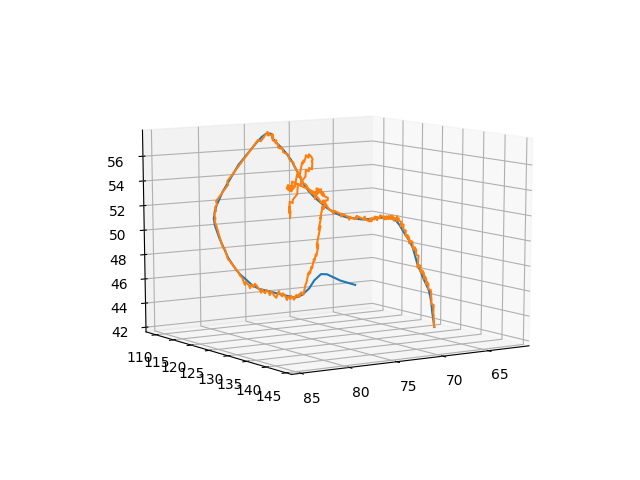

In [68]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

#for i in range(len(states)):
#    print(states[i], env.referenceStreamline_ijk[i])
#    distance = ((states.T[0][i] - env.referenceStreamline_ijk.T[0][i])**2 \
#                      + (states.T[1][i] - env.referenceStreamline_ijk.T[1][i] )**2 \
#                      + (states.T[2][i] - env.referenceStreamline_ijk.T[2][i])**2)
#    print(distance)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(env.referenceStreamline_ijk.T[0][:], env.referenceStreamline_ijk.T[1][:], env.referenceStreamline_ijk.T[2][:])
ax.plot3D(states.T[0][:], states.T[1][:], states.T[2][:])
#print(optimal_steps[:])

In [67]:
states = torch.stack(all_states)
print(states.T[0][:3])

tensor([63.0359, 63.0269, 62.9113], dtype=torch.float64)


In [14]:
len(all_states)

201

In [72]:
print(referenceLine[86])

tensor([ 71.7731, 113.9662,  79.6186])


In [70]:
env.reset()
print(env.state.getCoordinate().numpy(), referenceLine[0])
step = 0
#all_rewards = []
eps_reward = 0
for i in optimal_steps:
    next_state, distance, terminal = env.step(i)
    if distance < 0.71:
        reward = 1 - distance
        #print(reward)
        if reward < 0.3:
            reward = 1
    eps_reward += reward
    #all_rewards.append(reward)
    step += 1
print(eps_reward)

[ 73.651344 107.88106   93.29415 ] tensor([ 73.6513, 107.8811,  93.2942])
tensor(66.2049, dtype=torch.float64)


In [ ]:
for i in range(n_actions):
    
    next_state, distance, terminal = env.step(i)
    

In [8]:
env.reset()
terminal = False
step = 0
actions = []
past_state = env.state
step = 1
while terminal != True:
    for i in range(n_actions)
    action = np.random.randint(n_actions)
    next_state, reward, terminal = env.step(action)
    if reward < 1:
        actions.append(action)
        past_state = next_state
        print("Action: ", action, "Step: ",step, "Coordinates: ", next_state.getCoordinate().numpy(), referenceLine[step].numpy())
        step += 1
    else:
        env.state = past_state
        env.stepCounter = step
    #action = np.random.choice(possible_actions[step])
    #next_state, reward, terminal = env.step(action)
    #step += 1

print(actions)

Action:  100 Step:  1 Coordinates:  [ 73.651344 107.88106   93.29415 ] [ 74.42344 107.87124  93.08491]
Action:  67 Step:  2 Coordinates:  [ 74.34808267 107.88351105  92.57683017] [ 75.16057  107.88882   92.774536]
Action:  100 Step:  3 Coordinates:  [ 74.34808267 107.88351105  92.57683017] [ 75.78847 107.96255  92.28433]
Action:  100 Step:  4 Coordinates:  [ 74.34808267 107.88351105  92.57683017] [ 76.45265  108.118454  91.86654 ]
Action:  100 Step:  5 Coordinates:  [ 74.34808267 107.88351105  92.57683017] [ 77.116844 108.27435   91.448746]
Action:  100 Step:  6 Coordinates:  [ 74.34808267 107.88351105  92.57683017] [ 77.739716 108.54131   91.02359 ]
Action:  100 Step:  7 Coordinates:  [ 74.34808267 107.88351105  92.57683017] [ 78.36259  108.80828   90.598434]
Action:  100 Step:  8 Coordinates:  [ 74.34808267 107.88351105  92.57683017] [ 78.996666 109.15176   90.25207 ]
Action:  100 Step:  9 Coordinates:  [ 74.34808267 107.88351105  92.57683017] [ 79.630745 109.495224  89.9057  ]
Actio

KeyboardInterrupt: 

In [16]:
print(referenceLine[6])
print(referenceLine[7])

tensor([ 77.7397, 108.5413,  91.0236])
tensor([ 78.3626, 108.8083,  90.5984])


In [11]:
state = TractographyState(torch.Tensor([ 77.8994346, 108.7020324, 90.72022516]), env.interpolateDWIatState)
for i in range(n_actions):
    env.state = state
    env.stepCounter -= 1
    next_state, _, terminal = env.step(i)
    qry_pt = next_state.getCoordinate().view(-1,3)
    distance = torch.min(torch.sum((referenceLine[7] - qry_pt)**2, dim=1))
    if distance < 0.3:
        print(i, next_state.getCoordinate().numpy(), referenceLine[7].numpy(), distance.numpy())

tensor([ 78.1077, 108.7354,  91.6977], dtype=torch.float64)
tensor([ 77.7615, 108.8643,  91.6973], dtype=torch.float64)
tensor([ 77.8808, 108.4698,  91.6927], dtype=torch.float64)
tensor([ 78.0768, 109.0850,  91.6268], dtype=torch.float64)
tensor([ 77.5148, 108.5987,  91.6375], dtype=torch.float64)
tensor([ 78.3125, 108.4477,  91.5947], dtype=torch.float64)
tensor([ 77.7489, 109.2253,  91.5590], dtype=torch.float64)
tensor([ 77.6419, 108.2420,  91.5700], dtype=torch.float64)
tensor([ 78.4297, 108.8083,  91.5614], dtype=torch.float64)
tensor([ 77.4379, 108.9717,  91.5654], dtype=torch.float64)
tensor([ 78.0813, 108.1849,  91.5566], dtype=torch.float64)
tensor([ 78.1025, 109.3932,  91.4139], dtype=torch.float64)
tensor([ 77.3094, 108.3452,  91.4445], dtype=torch.float64)
tensor([ 78.6147, 108.4838,  91.3841], dtype=torch.float64)
tensor([ 77.4417, 109.2998,  91.3783], dtype=torch.float64)
tensor([ 77.8415, 107.9787,  91.4083], dtype=torch.float64)
tensor([ 78.3907, 109.1557,  91.4638], d

In [9]:
env.reset()
next_state, reward, terminal = env.step(100)
print(next_state.getCoordinate().numpy())
print(reward)
print(terminal)

tensor(187.0214)
[ 73.651344 107.88106   93.29415 ]
-1
True


In [49]:
print(possible_actions)

[[47, 75, 80, 88, 93, 96], [67, 75, 80, 88, 93], [62, 67, 75, 80], [62, 67, 75, 80, 83], [62, 67, 75, 80, 83], [62, 67, 75, 83, 96], [62, 67, 75, 83, 96], [62, 75, 83, 91, 96], [62, 75, 83, 91, 96], [62, 75, 83, 91, 96], [62, 70, 75, 83, 91, 96], [62, 70, 75, 78, 83, 91], [54, 57, 62, 67, 70, 75, 83], [54, 62, 67, 75], [54, 59, 67, 72], [51, 54, 59, 62, 67, 72], [51, 54, 59, 64, 67, 72], [51, 54, 59, 64, 67, 72], [51, 54, 59, 64, 67, 72], [51, 54, 56, 59, 64, 67, 72], [51, 54, 56, 59, 64, 67, 72], [51, 56, 59, 64], [51, 56, 59, 64], [51, 56, 59, 64], [50, 51, 53, 56, 59], [50, 51, 53, 56, 61, 66], [53, 58, 61, 66, 74, 79], [58, 66, 71, 74, 79], [58, 66, 71, 79], [58, 63, 66, 71, 79], [58, 63, 66, 71, 79], [58, 63, 66, 71, 79], [58, 63, 66, 71, 79], [58, 63, 66, 71, 79, 84], [58, 63, 71, 79, 84, 92], [58, 63, 71, 79, 84, 92], [63, 71, 79, 84, 92], [63, 71, 79, 84, 92], [38, 71, 79, 84, 92], [38, 63, 71, 84, 92, 97], [38, 71, 84, 92, 97], [38, 84, 92, 97], [38, 76, 84, 92, 97], [38, 76, 

In [8]:
env.state = TractographyState(referenceLine[85], env.interpolateDWIatState)
print(env.state.getCoordinate())
print(referenceLine[86])
print(possible_actions[85])
for i in possible_actions[85]:
    env.state = TractographyState(referenceLine[85], env.interpolateDWIatState)
    env.stepCounter = 84
    next_state, reward, _ = env.step(z)
    print(next_state.getCoordinate(), reward)

tensor([ 71.5173, 114.6476,  79.9506])
tensor([ 71.7731, 113.9662,  79.6186])
[64, 69, 77, 85, 90, 98]
tensor([ 71.5173, 114.6476,  79.9506]) tensor(0.4643)
tensor([ 71.5173, 114.6476,  79.9506]) tensor(0.4643)
tensor([ 71.5173, 114.6476,  79.9506]) tensor(0.4643)
tensor([ 71.5173, 114.6476,  79.9506]) tensor(0.4643)
tensor([ 71.5173, 114.6476,  79.9506]) tensor(0.4643)
tensor([ 71.5173, 114.6476,  79.9506]) tensor(0.4643)


In [76]:
#env.state = TractographyState(referenceLine[85], env.interpolateDWIatState)
for i in range(n_actions):
    env.reset()
    env.state = TractographyState(referenceLine[85], env.interpolateDWIatState)
    next_state, reward, _ = env.step(i)
    distance = env.rewardForTerminalState(next_state)
    if distance < 0.3:
        print(referenceLine[86].numpy(), next_state.getCoordinate().numpy(), distance.item())

[ 71.773056 113.966225  79.618576] [ 72.30127204 114.02878755  79.99932066] 0.27901215525974304
[ 71.773056 113.966225  79.618576] [ 71.7609279  113.6971063   80.14330044] 0.2753356828217112
[ 71.773056 113.966225  79.618576] [ 71.37937604 113.65758474  79.97858924] 0.15498393104601757
[ 71.773056 113.966225  79.618576] [ 71.66780472 114.12438903  79.11184227] 0.2567791198339029
[ 71.773056 113.966225  79.618576] [ 71.97880832 114.37794723  79.10548775] 0.26325960220840583
[ 71.773056 113.966225  79.618576] [ 71.31423388 113.95652005  79.25698482] 0.2105177635246191
[ 71.773056 113.966225  79.618576] [ 71.97504289 114.04982978  79.29253904] 0.10630013104166292
[ 71.773056 113.966225  79.618576] [ 71.63016002 113.84417747  79.3660627 ] 0.06376299386222199
[ 71.773056 113.966225  79.618576] [ 72.24376411 114.29266559  79.36222956] 0.2215660937612901
[ 71.773056 113.966225  79.618576] [ 71.91375289 113.81268975  79.56895814] 0.023572970787664616
[ 71.773056 113.966225  79.618576] [ 71.351

In [67]:
distance = env.rewardForTerminalState(next_state)
print(referenceLine[86])
print(distance)

tensor([ 71.7731, 113.9662,  79.6186])
tensor(122.0777, dtype=torch.float64)


In [26]:
for i in range(n_actions):
    env.state = TractographyState(torch.FloatTensor([ 74.64776812, 107.9270337, 93.22325858]), env.interpolateDWIatState)
    next_state, reward, _ = env.step(i)
    env.stepCounter = 2
    if reward < 0.1:
        reward = 1
    elif reward < 0.5:
        reward = 0
    else:
        reward = -1
    if reward == 1:
        #best_actions.append(i)
        print("[{}]".format(i), referenceLine[2].numpy(), next_state.getCoordinate().numpy(), reward)
#print(best_actions)

In [ ]:
state = TractographyState(torch.FloatTensor(referenceLine[0]), env.interpolateDWIatState)
coordinates = state.getCoordinate()

In [ ]:
print(referenceLine[0])

In [ ]:
print(referenceLine[0])
print(referenceLine[70])

In [ ]:
state = TractographyState(referenceLine[69], env.interpolateDWIatState)

In [ ]:
shape = env.reset().getValue().reshape(-1).shape[0]
print(shape)

In [ ]:
state = torch.FloatTensor(state.getValue()).unsqueeze(0).to(device)

In [ ]:
q_vals = agent.main_dqn(state)

In [ ]:
print(state.getValue().shape)
shape = state.getValue().shape
shape = np.prod(np.array(shape))
print(shape)

In [ ]:
state = TractographyState(referenceLine[70], env.interpolateDWIatState)
qry_pt = torch.FloatTensor(state.getCoordinate()).view(-1,3)
distance = torch.min(torch.sum( (referenceLine - qry_pt)**2, dim =1 ))
qry_pt = torch.FloatTensor(state.getCoordinate()).view(3)
distance_terminal = torch.sum( (referenceLine[-1,:] - qry_pt)**2 )

#print(distance)
#print(distance_terminal)
reward = (torch.tanh(-distance+5.3) + 2*torch.tanh(-distance_terminal+5.3))/2
print(reward)

print(torch.tanh(-distance+5.3))
print(torch.tanh(-distance_terminal+5.3))

reward += 200/20 * reward.sign()
print(reward)

In [ ]:
print(torch.tanh(-distance_terminal+5.3)+2)

In [ ]:
state = TractographyState([32., 84., 94.], env.interpolateDWIatState)
qry_pt = torch.FloatTensor(state.getCoordinate()).view(-1,3)
distance = torch.min(torch.sum( (referenceLine - qry_pt)**2, dim =1 ))
print(torch.tanh(-distance+5.3))
qry_pt = torch.FloatTensor(state.getCoordinate()).view(3)
distance = torch.sum( (referenceLine[-1,:] - qry_pt)**2 )
print(-distance)
print(torch.tanh(-distance)+2)
#print(torch.where(distance < env.maxL2dist_to_terminalState, 1, 0 ))

In [ ]:
print(-1.5 + 5)

In [ ]:
qry_pt = torch.FloatTensor(state.getCoordinate()).view(3)
distance = torch.sum( (referenceLine[-1,:] - qry_pt)**2 )
print(round(-distance.item(),4))

In [ ]:
print("Init agent")
#memory = ReplayMemory(size=replay_memory_size)
state = env.reset()
agent = Agent(n_actions=n_actions, inp_size=state.getValue().shape, device=device, hidden=256, agent_history_length=agent_history_length, memory_size=replay_memory_size, learning_rate=learning_rate)

print("Init epsilon-greedy action scheduler")
action_scheduler = Action_Scheduler(num_actions=n_actions, max_steps=max_steps, eps_annealing_steps=100000, replay_memory_start_size=replay_memory_size, model=agent.main_dqn)

step_counter = 0
    
eps_rewards = []

print("Start training...")
while step_counter < max_steps:
    epoch_step = 0

######## fill memory begins here
    while epoch_step < evaluate_every:  # To Do implement evaluation
        state = env.reset()
        episode_reward_sum = 0
        
        #fill replay memory while interacting with env
        for episode_counter in range(max_episode_length):
            # get action with epsilon-greedy strategy       
            action = action_scheduler.get_action(step_counter, torch.FloatTensor(state.getValue()).to(device).unsqueeze(0))
                    
            next_state, reward, terminal = env.step(action)

            if reward >= 1:
                reward = 10
            elif reward > -0.05:
                reward = 1
            
            if episode_counter == max_episode_length-1:
                reward = -100
                terminal = True
            # increase counter
            step_counter += 1
            epoch_step += 1

            # accumulate reward for current episode
            episode_reward_sum += reward


            agent.replay_memory.add_experience(action=action,
                                state=state.getValue(),
                                reward=reward,
                                new_state=next_state.getValue(),
                                terminal=terminal)


            state = next_state

        

            ####### optimization is happening here
            if step_counter > replay_memory_size:
                loss = agent.optimize()


            ####### target network update
            if step_counter > replay_memory_size and step_counter % network_update_every == 0:
                agent.target_dqn.load_state_dict(agent.main_dqn.state_dict())
            
            # if episode ended before maximum step
            if terminal:
                terminal = False
                state = env.reset()
                break
                
        eps_rewards.append(episode_reward_sum)
        
        if len(eps_rewards) % 10 == 0:
            with open(path+'/logs/rewards.dat', 'a') as reward_file:
                print("[{}] {}, {}".format(len(eps_rewards), step_counter, np.mean(eps_rewards[-100:])), file=reward_file)
            print("[{}] {}, {}".format(len(eps_rewards), step_counter, np.mean(eps_rewards[-100:])) )
    torch.save(agent.main_dqn.state_dict(), path+'/checkpoints/fibre_agent_{}_reward_{:.2f}.pth'.format(step_counter, np.mean(eps_rewards[-100:])))
########## evaluation starting here
    eval_rewards = []
    for _ in range(eval_runs):
        eval_steps = 0
        state = env.reset()
        eval_episode_reward = 0
        while eval_steps < max_episode_length:
            action = action_scheduler.get_action(step_counter, torch.FloatTensor(state.getValue()).to(device).unsqueeze(0), evaluation=True)

            next_state, reward, terminal = env.step(action)

            eval_steps += 1
            eval_episode_reward += reward
            state = next_state

            if terminal:
                terminal = False
                break

        eval_rewards.append(eval_episode_reward)
    
    print("Evaluation score:", np.mean(eval_rewards))

In [ ]:
#!mkdir -p 'checkpoints/'
#torch.save(agent.main_dqn.state_dict(), 'checkpoints/fiber_agent_{}_reward_{:.2f}.pth'.format(step_counter, np.mean(rewards[-100:])))